The work below is not meant as a final project. It is a developing project.

# Project 4 – NLP Model

* Student name: Greg Osborne
* Student pace: self paced / part time
* Scheduled project review date/time: 3/17/23
* Instructor name: Morgan Jones
* Blog post URL: https://medium.com/@gregosborne

## Business Understanding
### Stakeholder: 
Google
### Problem: 
Some people view Google more negatively than their chief competitor, Apple. Google needs a tool to help measure the publics' sentiment toward both Apple and Google to strategize for a more positive public sentiment. This tool will offer Google insight to guide their business decisions. 

### Using Natural Language Processing (NLP) to build a tool

Google's departments of both Public Relations and product development could benefit from a snapshot of the publics' perception of both Google and their competition, Apple. The input of this model is tweets that discuss either Google or Apple. The output will how many of the tweets view both companies, positively and negatively, as well as a mentioning them in a neutral way. The model will also classify whether each tweet addresses the company brand, or the products it makes. So each tweet is classified as:

1. Company: Google or Apple
2. Aspect of Company: Brand or Product
3. Emotion: Positive, Negative, or Neutral

This works out to each tweet being classified as one of twelve different classifications:

1.  Negative - Apple  - Brand
2.  Neutral  - Apple  - Brand
3.  Positive - Apple  - Brand
4.  Negative - Apple  - Products
5.  Neutral  - Apple  - Products
6.  Positive - Apple  - Products
7.  Negative - Google - Brand
8.  Neutral  - Google - Brand
9.  Positive - Google - Brand
10. Negative - Google - Products
11. Neutral  - Google - Products
12. Positive - Google - Products

The second insight the Natural Language Processing provides comes in associated words. When you think of McDonald's, you probably think of some kind of food, you may also think of Happy Meals, Burgers, French Fries, or a sugary iced frappuccino. What do people think when they think of when they think about Google? Or Google's competition Apple?

Through Word2Vec vectorization methods, we can assign a multidimensional vector to each word found in a set of tweets. Then, we can measure which words align the best. By doing so, we can see what words people identify with each company, and the companies products. And, we can perform this analysis for people speaking both negatively and positively.

Greg Osborne accepted the challenge to build such a tool.

## Python Libraries

In [1]:
#DataFrames and computation
import pandas as pd
import numpy as np

# Graphing
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
from collections import Counter
%matplotlib inline
import plotly.express as px
from palettable.colorbrewer.qualitative import Pastel1_7
import plotly.figure_factory as ff #deleteme?

#Import the Tokenize library
from nltk.tokenize import RegexpTokenizer

# For Frequency Distributions
from nltk import FreqDist
from matplotlib.ticker import MaxNLocator

# For Wordclouds
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

# For stopwords
import nltk
from nltk.corpus import stopwords

# For stemming words
from nltk.stem.snowball import SnowballStemmer

#The Train/Test Split
from sklearn.model_selection import train_test_split

# Import the TfidfVectorizer class
from sklearn.feature_extraction.text import TfidfVectorizer

# Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# Word2Vec
import gensim

#For Min/Max Scaling
from sklearn.preprocessing import MinMaxScaler

# Scores
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

#Logistic Regression Model Classifier
from sklearn.linear_model import LogisticRegression

# Support Vector Machine
from sklearn import svm

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#For XGBoost Classifier
from xgboost import XGBClassifier

# The Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# For Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
#from xgboost import XGBClassifier

#Setting DataFrame Display settings
pd.set_option("display.max_rows", 600)

#Formatting decimals to show three numbers after the point.
pd.options.display.float_format = '{:,.3f}'.format

#plt.rcParams.update(plt.rcParamsDefault)


Note, after data cleaning, I will run the entire dataset through the data cleaning process a second time, but without making the same deletions. Therefore, I will program most actions in the form of functions so they can be repeated after data cleaning.

# Data Cleaning
## Loading the Data and Previewing It
The set of tweets gleaned for this project were all written during the 2011 South By South West festival (Abbreviated as SXSW). Both Google and Apple came to the festival with showcases of their products and presentations about the future direction of the tech industry. Apple constructed a "Pop-Up" store during the event, and people waited in line for hours to get a new iPad2. Google did not launch any new products, but there were rumors and excitement for the imminent launch of their social media platform, codenamed Google Circles. Google held a big party and had one of their top executives, Marissa Mayer, speak.

No, I'll begin to analyze the collected tweets. The first step of any Data Science analysis is, of course, loading and previewing the data.

In [2]:
df_raw = pd.read_csv("judge-1377884607_tweet_product_company.csv",
                     encoding='ANSI')
df_raw.head(7)

tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   
5  @teachntech00 New iPad Apps For #SpeechTherapy...   
6                                                NaN   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   
5                             NaN   
6                             NaN   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                                   Negative emotion  
4                                   Positive emotion  
5                 No emotion toward brand or product  
6                 No emotion toward brand or product

In [3]:
print('The DataFrame includes',len(df_raw), 'rows of data.')
print()
df_raw.info()

The DataFrame includes 9093 rows of data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


From this, I see that there are a total of 9093 rows. The tweet_text column is missing one cell of data. However, the emotion_in_tweet_is_direct_at column dwarfs that number at 5801 missing cells. I'll have to account for both of these columns during data cleaning.

### Value counts of categorized columns
The people who created this dataset hand classified several of the tweets as one of the following categories. Unfortunately, this classification is incomplete, as nearly 6000 tweets are unclassified in this manner. 

In [4]:
df_raw['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

Likewise, the people who created this dataset classified each tweet as either positive, negative, neutral) or indecipherable. These labels are given to each tweet, though the tweets labeled "I can't tell" were not used in the model or analysis. However, that leaves nearly 9000 classified tweet with which to do our analysis.

In [5]:
df_raw['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

Analysis and explanation of next steps.

### Rename Columns
The columns need more succinct names.

In [6]:
def rename_columns(dforg):
    name = {
        'tweet_text': 'Tweet',
        'emotion_in_tweet_is_directed_at': 'Product',
        'is_there_an_emotion_directed_at_a_brand_or_product': 'Emotion'
        }
    dfone = dforg.copy()
    dfone = dfone.rename(columns=name)
    return dfone.copy()
df = rename_columns(df_raw)
df.head()

Tweet             Product  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2  @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3  @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   

            Emotion  
0  Negative emotion  
1  Positive emotion  
2  Positive emotion  
3  Negative emotion  
4  Positive emotion

In [7]:
#The labels for the emotions need to change to short labels for graphing
#purposes.
def abbreviate_emotion(dfone):
    for i in range(len(dfone)):
        if dfone.loc[i, 'Emotion'] == 'No emotion toward brand or product':
            dfone.loc[i, 'Emotion'] = 'Neutral'
        elif dfone.loc[i, 'Emotion'] == 'Negative emotion':
            dfone.loc[i, 'Emotion'] = 'Negative'
        elif dfone.loc[i, 'Emotion'] == 'Positive emotion':
            dfone.loc[i, 'Emotion'] = 'Positive'
        elif dfone.loc[i, 'Emotion'] == "I can't tell":
            dfone.loc[i, 'Emotion'] = 'Indecipherable'
    return dfone.copy()

df = abbreviate_emotion(df)

### Visualize the quantities of the data.

In [8]:
temp = df.groupby('Emotion').count()[
    'Tweet'].reset_index().sort_values(by='Tweet',ascending=False)
temp.style.background_gradient(cmap='Reds')

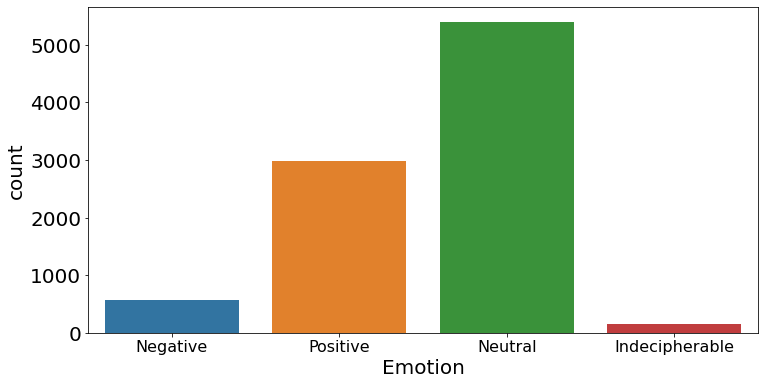

In [9]:
font = {'family' : 'DejaVu Sans',
            'weight' : 'normal',
            'size'   : 16}
plt.rc('font', **font)
plt.figure(figsize=(12,6))
plt.rc('axes', labelsize=20) 
plt.rc('ytick', labelsize=20) 
sns.countplot(x='Emotion',data=df);

#deleteme
fig = go.Figure(go.Funnelarea(
    text =temp['Emotion'],
    values = temp['Tweet'],
    title = {"position": "top center", "text":
             "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

As is clear, there are more positive and neutral tweets in the set than either negative or indecipherable, contrasting people's general opinion of Twitter. This will likely mean that the model will not be as accurate in predicting a negative emotion in a tweet. I'll see when I get there.

## Preparing Data For Analysis
### Standardizing Case
NLP will recognize words by the characters used in succession that make them up. So "This" will be distinct from "this". To solve this problem, I'll make every alphabet character in the tweets lowercase.

In [10]:
df['Tweet'] = df['Tweet'].str.lower()
df.head()

Tweet             Product  \
0  .@wesley83 i have a 3g iphone. after 3 hrs twe...              iPhone   
1  @jessedee know about @fludapp ? awesome ipad/i...  iPad or iPhone App   
2  @swonderlin can not wait for #ipad 2 also. the...                iPad   
3  @sxsw i hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on fri #sxsw: marissa m...              Google   

    Emotion  
0  Negative  
1  Positive  
2  Positive  
3  Negative  
4  Positive

### Testing for bad data
There are 9093 rows of data and 9092 filled cells in the Tweet column. Therefore, one of the Tweet cells contains no value, so these next two cells detect which row is missing tweet data and deletes it. 

In [11]:
#Testing for any Tweets that are not strings
bad_tweets = []
for i in range(len(df)):
    typ = type(df.loc[i, 'Tweet'])
    if typ != str:
        print('Index number {} is missing a value in the'.format(i),
              'Tweet column.')
        bad_tweets.append(i)

Index number 6 is missing a value in the Tweet column.


In [12]:
#Dropping bad data and reseting the index
df.drop(index=bad_tweets, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(8)

Tweet             Product  \
0  .@wesley83 i have a 3g iphone. after 3 hrs twe...              iPhone   
1  @jessedee know about @fludapp ? awesome ipad/i...  iPad or iPhone App   
2  @swonderlin can not wait for #ipad 2 also. the...                iPad   
3  @sxsw i hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on fri #sxsw: marissa m...              Google   
5  @teachntech00 new ipad apps for #speechtherapy...                 NaN   
6  #sxsw is just starting, #ctia is around the co...             Android   
7  beautifully smart and simple idea rt @madebyma...  iPad or iPhone App   

    Emotion  
0  Negative  
1  Positive  
2  Positive  
3  Negative  
4  Positive  
5   Neutral  
6  Positive  
7  Positive

### Combining compound nouns
A compound noun is two or more words that make a noun that are not referring to the same thing separately. For instance, *Apple* can mean the brand, *Store* can mean any store, but the compound noun *Apple Store* refers to something neither word refers to alone.

I'll get better results in this NLP analysis if I standardize the corpus's compound nouns using underscores for spaces. I'll do this before tokenization.

In [13]:
# This function searches the tweets for keys in a given dictionary and replaces
# them with the associated value.
# df = The dataframe to search
# begin_replace = There are some tweets that begin with someone's last name,
#                 this requires separate coding to insert their first name
#                 before their last, so this dictionary will specify those
#                 compound nouns that need this treatment.
# replace_dict  = The dictionary with keys and values that turns more than one
#                 word into compound nouns with underscores.

def string_replace(dfone, begin_replace, replace_dict, to_print = True):
    counts = pd.DataFrame(columns = ['Replaced'])
    for n in range(len(dfone)):
        tweet = dfone.loc[n,'Tweet']
        for fnd, replce in zip(begin_replace.keys(), begin_replace.values()):
            if fnd in tweet[0:len(fnd)]:
                tweet = replce + tweet[len(fnd):]
                replced = fnd + ' / ' + replce
                counts.loc[len(counts),'Replaced'] = replced
                dfone.loc[n,'Tweet'] = ''+tweet
        for find, replace in zip(replace_dict.keys(), replace_dict.values()):
            if find in tweet:
                change = False
                first = tweet[0:len(find)]
                last = tweet[len(tweet) - len(find):]
                if (find in first):
                    change = True
                    tweet = replace + tweet[len(find):]
                    replaced = find + ' / ' + replace
                    counts.loc[len(counts),'Replaced'] = replaced
                if (find in last):
                    change = True
                    tweet = tweet[:len(tweet)-len(find)] + replace
                    replaced = find + ' / ' + replace
                    counts.loc[len(counts),'Replaced'] = replaced
                complete = 0
                while complete < len(tweet) - len(find):
                    for i in range(0, len(tweet) - len(find)):
                        if find in tweet[i:i+len(find)]:
                            change = True
                            first = tweet[:i]
                            last = tweet[i+len(find):]
                            tweet = first + replace + last
                            complete = 0
                            replaced = find + ' / ' + replace
                            counts.loc[len(counts),'Replaced'] = replaced
                            break
                        else:
                            complete += 1
                if change == True:
                    dfone.loc[n,'Tweet'] = ''+tweet
    if to_print == True:
        if counts.empty:
            print('No replacements made.')
        else:
            print(counts.value_counts())
    return dfone.copy()

I created this list by reading which words came up most often in the dataset I started with the most numerous words and went down the list in descending order. As I read certain words, I'd then investigate. Seeing the word Tyson led me to search for the word Tyson in the tweets, which led me to learn that Mike Tyson was at SXSW 2011. So his compound noun is mike_tyson.

In [14]:
first_replace = {'mayer'                 : 'marissa_mayer',
                 'vinh'                  : 'khoi_vinh'}

replacements =  {'apple store'           : 'apple_store',
                 'applestore'            : 'apple_store',
                 'apple_stores'          : 'apple_store',
                 'app store'             : 'app_store',
                 'appstore'              : 'app_store',
                 'marissa mayer'         : 'marissa_mayer',
                 'marissa meyer'         : 'marissa_mayer',
                 'marissameyer'          : 'marissa_mayer',
                 'marissamayer'          : 'marissa_mayer',
                 'marisa meyer'          : 'marissa_mayer',
                 'marissa@mention'       : 'marissa_mayer',
                 'melissa mayer'         : 'marissa_mayer',
                 'merissa mayer'         : 'marissa_mayer',
                 'm mayer'               : 'marissa_mayer',
                 'm.mayer'               : 'marissa_mayer',
                 '-mayer'                : 'marissa_mayer',
                 '#mayer'                : '#marissa_mayer',
                 ' mayer'                : 'marissa_mayer',
                 'marissa_mayers'        : 'marissa_mayer',
                 "marissa_mayer's"       : 'marissa_mayer',
                 'mentionmarissa_mayer'  : 'mention marissa_mayer',
                 '#mayer'                : '#marissa_mayer',
                 "tim o'reilly"          : "tim_o_reilly",
                 'tim oreilly'           : "tim_o_reilly",
                 "tim_o'reilly's"        : "tim_o_reilly",
                 "tim_o'reillys"         : "tim_o_reilly",
                 "'re"                   : ' are',
                 'tim o areily'          : "tim_o_reilly",
                 'tim soo'               : 'tim_soo',
                 'tim ferris'            : 'tim_ferris',
                 'tim_ferriss'           : 'tim_ferris',
                 'tim wu'                : 'tim_wu',
                 'matt mullenweg'        : 'matt_mullenweg',
                 'matt_mullenwegs'       : 'matt_mullenweg',
                 "matt_mullenweg's"      : 'matt_mullenweg',
                 'jonathan dahl'         : 'jonathan_dahl',
                 'mark belinsky'         : 'mark_belinsky',
                 'maggie mae'            : 'maggie_mae',
                 'maggie may'            : 'maggie_mae',
                 "maggie_mae's"          : 'maggie_mae',
                 "maggie_maes"           : 'maggie_mae',
                 "mike tyson"            : 'mike_tyson',
                 "mike_tyson's"          : 'mike_tyson',
                 "mike_tysons"           : 'mike_tyson',
                 "tyson's"               : 'mike_tyson',
                 'matt damon'            : 'matt_damon',
                 'barry diller'          : 'barry_diller',
                 'nyt'                   : 'ny_times',
                 'new york times'        : 'ny_times',
                 'ny times'              : 'ny_times',
                 "can't"                 : 'can not',
                 "won't"                 : 'would not',
                 "n't"                   : ' not',
                 "'ve"                   : ' have',
                 "'ll"                   : ' will',
                 'steve jobs'            : 'steve_jobs',
                 'pop up'                : 'pop_up',
                 'popup'                 : 'pop_up',
                 'pop-up'                : 'pop_up',
                 'pop shop'              : 'pop_up shop',
                 'pop-uitp'              : 'pop_up',
                 'pop- up'               : 'pop_up',
                 'pop-u‰û_'              : 'pop_up',
                 'pop-store'             : 'pop_up store',
                 'pop store'             : 'pop_up store',
                 'wi-fi'                 : 'wifi',
                 'wi fi'                 : 'wifi',
                 '.com'                  : 'com',
                 'dennis crowley'        : 'dennis_crowley',
                 ' crowley'              : 'dennis_crowley',
                 'i-phone'               : 'iphone',
                 'i-pad'                 : 'ipad',
                 'ipads'                 : 'ipad',
                 'iphones'               : 'iphone',
                 'ipad 2'                : 'ipad2',
                 'ipad_2'                : 'ipad2',
                 'ipad2s'                : 'ipad2',
                 'ipad 1'                : 'ipad1',
                 'ipad1s'                : 'ipad1',
                 'iphone app'            : 'iphone_app',
                 'ipad app'              : 'ipad_app',
                 'andoid'                : 'android',
                 'droid app'             : 'droid_app',
                 'iphone_app_store'      : 'iphone app_store',
                 'ipad_app_store'        : 'ipad app_store',
                 'droid_app_store'       : 'droid app_store',
                 'iphone_apps'           : 'iphone_app',
                 'ipad_apps'             : 'ipad_app',
                 'iphone_application'    : 'iphone application',
                 'droid_apps'            : 'droid_app',
                 ' droid_app'            : ' android_app',
                 'ûªll'                  : ' will',
                 "‰ûªs"                  : "'s",
                 "‰ûªre"                 : ' are',
                 "ûªt"                   : ' not',
                 'khoi vinh'             : 'khoi_vinh',
                 'jonathan ive'          : 'jonathan_ive',
                 'winsåêsxsw'            : 'wins sxsw',
                 'matt carlson'          : 'matt_carlson',
                 'matthew davis'         : 'matthew_davis',
                 'william patry'         : 'william_patry',
                 'josh williams'         : 'josh_williams',
                 'david foster'          : 'david_foster',
                 'david carr'            : 'david_carr',
                 'û_please'              : 'please',
                 'adam beckley'          : 'adam_beckley',
                 'paul adams'            : 'paul_adams'}

df = string_replace(df, first_replace, replacements)

Replaced                                    
ipad 2 / ipad2                                  988
apple store / apple_store                       597
pop-up / pop_up                                 423
n't /  not                                      377
're /  are                                      269
iphone app / iphone_app                         251
popup / pop_up                                  222
marissa mayer / marissa_mayer                   178
ipad app / ipad_app                             157
pop up / pop_up                                 157
'll /  will                                     139
've /  have                                     117
.com / com                                       97
app store / app_store                            90
ipads / ipad                                     89
can't / can not                                  78
droid app / droid_app                            73
ipad2s / ipad2                                   47
ipad_apps / ipad_ap

### Tokenize
The process of tokenizing the data is to turn each tweet into a list, with each word becomes a single item on the list. This will allow NLP methods to work their analytical magic.

In [15]:
# Creating the tokenizer
basic_token_pattern = r"(?u)\b\w\w+\b"
words_and_hashtags_token_pattern = r"(?u)\#?\b\w\w+\b"
hashtags_token_pattern = r"(?u)\#\b\w\w+\b"

tokenizer = RegexpTokenizer(basic_token_pattern)
hashtag_tokenizer = RegexpTokenizer(hashtags_token_pattern)
words_and_hashtags_tokenizer = RegexpTokenizer(words_and_hashtags_token_pattern)

In [16]:
# Creating a new column for the tokenized tweet
def tokenize_columns(dfone):
    dfone['Tokens'] = None
    dfone['Tokens With Hashtags'] = None
    dfone['Hashtags'] = None

    # Creating the token lists. One list will include tokens of each words, the
    # other will only include the words used as Hashtags.
    for i in range(len(dfone)):
        dfone['Tokens'][i] = tokenizer.tokenize(dfone['Tweet'][i])
        dfone['Tokens With Hashtags'
             ][i] = words_and_hashtags_tokenizer.tokenize(dfone['Tweet'][i])
        dfone['Hashtags'][i] = hashtag_tokenizer.tokenize(dfone['Tweet'][i])
    return dfone.copy()

df = tokenize_columns(df)

In [17]:
# Creates a dictionary of specified keys with a count as the values, and then
# sorts the list from greatest to least in dictionary form.
def tally(lst):
    tally_dict = {}
    for item in lst:
        if item not in tally_dict:
            tally_dict[item] = 1
        else:
            tally_dict[item] += 1
    #Sorting the dictionaries
    count = sorted(tally_dict.items(), key=lambda x: x[1], reverse=True)
    return count

#moveme? #deleteme

#Previewing the top 100 used words.
all_tokens = []
for num in df.index:
    new = df.loc[num, 'Tokens']
    for word in new:
        all_tokens.append(word)
word_count = tally(all_tokens)

print(len(word_count))
word_count[0:100]

#deleteme

#I used this cell to develop the dictionary for the 
#replacement dictionary above.

for i in df.index:
    if 'tyson' in df.loc[i, 'Tokens']:
        print(i, df.loc[i, 'Tweet'])
        print()
#deleteme

###Word Frequency
#deleteme

temp_two = df.copy()
temp_two['Temp'] = temp_two['Tweet'].apply(lambda x:str(x).split())

temp_count_two = Counter([item for sublist in temp_two['Temp'] for item in sublist])
temp_counts_two = pd.DataFrame(temp_count_two.most_common(20))
temp_counts_two.columns = ['Common Words','Count']
#temp_counts_two.style.background_gradient(cmap='Blues') #deleteme

fig = px.bar(temp_counts_two, x="Count", y="Common Words",
             title='Common Words in The Entire Dataset',
             orientation='h', 
             width=700, height=700, color='Common Words')
fig.show()
#deleteme

fig = px.treemap(temp_counts_two, path=['Common Words'], values='Count',
                 title='Tree of Most Common Words for The Entire Dataset')
fig.show()
#deleteme

plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(temp_counts_two['Count'], labels=temp_counts_two['Common Words'], colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Common Words for The Entire Dataset')
plt.show()
#deleteme

## Purging Retweets Identical to Included Originals

Multiple tweets included in the dataset are identical to each other besides one of them beginning with the words "rt" and "mention". We see so many begin with "rt" because that is Twitter shorthand for "retweet," which is an exact copy of someone else's tweet with the option to add a few words at the beginning. The @mention word is common because it follows the format of Twitter usernames, also known as Twitter handles. The dataset censors anyone's twitter handle, ex: @TwitterHandle, by replacing the handle with @mention. The reason "mention" is so often the second word is that "rt @mention" is the default beginning for retweeting a tweet, with "mention" being the original author's twitter handle. 

But just how popular are these first and second words? Here's a counts for each:

In [18]:
# Top Ten first words
temp_first_words = df.copy()
temp_first_words['First'] = temp_first_words['Tokens'].apply(lambda x:x[0])
temp_first_words['Second'] = temp_first_words['Tokens'].apply(lambda x:x[1])

temp_count_first_words = Counter(temp_first_words['First'])
temp_counts_first = pd.DataFrame(temp_count_first_words.most_common(5))
temp_counts_first.columns = ['Top Five First Words','First Words Count']

temp_count_first_words = Counter(temp_first_words['Second'])
temp_counts_second = pd.DataFrame(temp_count_first_words.most_common(5))
temp_counts_second.columns = ['Top Five Second Words','Second Words Count']
temp = pd.concat([temp_counts_first, temp_counts_second], axis=1)
temp.index = np.arange(1, len(temp) + 1)
temp.style.background_gradient(cmap='Blues')

1990 retweets and then 2276 that have mention as the second word. That's a lot.

If two tweets are identical in every way except for the first or second words, then they are not worth analyzing twice. I'll get rid of all retweets that have the original tweet in the dataset. These retweets do not add value to the model.

The process of checking for retweets can be done multiple times with slightly different methodology. In the cells below, I use three methodologies:

**The cells below check for matches after...:**
1. Deleting the initial "rt" and then every subsequent repeated instance of "mention" from the retweet.
2. Deleting every initial repeated instance of both "rt" and "mention" from the retweet.
3. Deleting the first one through six words from the retweet.

To account for these slight differences, I created four functions to make this process easily repeatable. The parameters allow me to change which methodology I use.

**The four functions below perform the following four actions:**
1. Create a Dataframe with nothing but the retweets, including the tokenized versions.
2. Trim the retweets by specified parameters.
3. Check to see if there is an exact match for each trimmed retweet in the original dataset.
4. Purge the retweets.

The final step, deleting the retweet from the dataset, is wrapped into another function that performs all of these steps at once.

fig = px.bar(temp_counts_first_word, x="Count", y="Top Ten First Words",
             title='Common First Words in The Entire Dataset',
             orientation='h', 
             width=700, height=700, color='Top Ten First Words')
fig.show()

#deleteme

fig = px.treemap(temp_counts_first_word, path=['Top Ten First Words'], values='Count',
                 title='Tree of Most Common First Words for The Entire Dataset')
fig.show()

#deleteme

plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(temp_counts_first_word['Count'], labels=temp_counts_first_word['Top Ten First Words'], colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Common First Words for The Entire Dataset')
plt.show()

#deleteme

### The Retweet Purge Functions

Now, for the four functions described above.

In [19]:
#Creating a df of nothing but the retweets
def retweet_trim_one(dfone):
    for i in dfone.index:
        twt = dfone.loc[i, 'Tokens']
        #Twitter parlance: rt = retweet
        #Dropping all tweets that don't start in rt
        if 'rt' != twt[0]:
            dfone.drop(index=i, inplace=True)
    return dfone

In [20]:
# Trimming the terms rt and mention from the beginning of the tweet, counting
# the first and second words of the remaining tweets, and determining which
# tweets to drop. 

def retweet_trim_two(dftwo, drop_first_words=['skip'], drop_num=1):
    #Creating a column to put the trimmed retweet
    dftwo['trimmed_rt'] = 'Blank'
    dftwo['Match'] = False

    #I want to test the data to see if there's anything that stands out as
    #repetitive in the first or second words of the newly trimmed tweets.
    #Creating a list of the first and second words of each trimmed tweet.
    firstword_lst = []
    secondword_lst = []

    #Starting a list to drop any retweets.
    retweets_to_drop = []

    for i in dftwo.index:
        #making the trimmed variable, the tokens of the next tweet to edit
        trimmed = dftwo.loc[i, 'Tokens']
        #Removing the set number of dropped tokens.
        #Default is just the first token, "rt."
        trimmed = trimmed[drop_num:]
        if len(trimmed) == 0:
            if drop_num == 1:
                retweets_to_drop.append(i)
                dftwo['Match'][i] = True
            continue
        #Several retweets include 'mention' after the rt, so I'll trim that.
        #This while loop quits dropping words with the first token that isn't
        #in the drop list specified by parameter.
        if drop_first_words != ['skip']:
            while trimmed[0] in drop_first_words:
                trimmed = trimmed[1:]
                #Some tweets contained only "rt" and "mention," and are now
                #empty."
                #Adding any empty token lists to the retweets_to_drop list.
                if len(trimmed) == 0:
                    if drop_num == 1:
                        retweets_to_drop.append(i)
                        dftwo['Match'][i] = True
                    break
        if len(trimmed) == 0:
            continue

        #Adding first and second words of the trimmed tweet to the lists.
        firstword_lst.append(trimmed[0])
        secondword_lst.append(trimmed[1])

        #Replacing the trimmed tokens to a new column, "trimmed_rt".
        dftwo['trimmed_rt'][i] = trimmed

    #I want to test the data to see if there's anything that stands out as
    #repetitive in the first word of the newly trimmed tweets.
    #Creating a dictionary to count the first word in each trimmed tweet.

    firstword_count = tally(firstword_lst)
    secondword_count = tally(secondword_lst)

    return dftwo, firstword_count, secondword_count, retweets_to_drop

In [21]:
#Checking to see if any of theses newly trimmed retweets are exact matches of
#Original tweets in the dataset.


def retweet_trim_three(dfthree, dforg, retweets_to_drop):
    original_tweets = []

    for i in dforg.index:
        original_tweets.append(dforg.loc[i, 'Tokens'])

    for i in dfthree.index:
        retweet = dfthree.loc[i, 'trimmed_rt']
        if retweet in original_tweets:
            dfthree.loc[i, 'Match'] = True
            retweets_to_drop.append(i)

    return dfthree, retweets_to_drop

In [22]:
# Creating a single function that runs all of the previous functions but allows
# a list parameter to choose what words are filtered out of the first words.
# Also allows for deleting the duplicate tweets in one function.
def retweet_trim_all(retweets, word_list=['skip'], delete=True, drop=1):
    retweets = retweet_trim_one(retweets)
    retweets, fw, sw, rtd = retweet_trim_two(retweets, word_list, drop)
    retweets, rtd = retweet_trim_three(retweets, df, rtd)
    #Dropping the tweets.
    if delete == False:
        print(retweets['Match'].value_counts())
        return retweets.loc[retweets['Match'] == True]
    df.drop(index=rtd, inplace=True)
#    df.reset_index(drop=True, inplace=True)
    return retweets['Match'].value_counts()

### Purge Retweets: Deleting Initial Words "rt" & "mention"

As discussed above, these cells delete any retweet that matches an original tweet once the initial "rt" and every subsequent repeated "mention" are removed from the beginning of the retweet.

In [23]:
# Creating a copy of the dataframe for editing.
retweets = df[['Tweet', 'Tokens']].copy()

# Purging original tweets from the new copy, so that all that is left
# are retweets.
retweets = retweet_trim_one(retweets)

# Creating an initial count of all retweets
retweet_count = len(retweets)

# Previewing the retweets.
retweets.head()

Tweet  \
24    rt @laurieshook: i'm looking forward to the #s...   
25    rt haha, awesomely rad ipad_app by @madebymany...   
199   rt ' it's 4 p.m. and the #ipad2 line at the ap...   
867   rt hiring marketers, designers, creatives, soc...   
1054  l.a.m.e.  rt @mention &quot;...by the law of a...   

                                                 Tokens  
24    [rt, laurieshook, looking, forward, to, the, s...  
25    [rt, haha, awesomely, rad, ipad_app, by, madeb...  
199   [rt, it, and, the, ipad2, line, at, the, apple...  
867   [rt, hiring, marketers, designers, creatives, ...  
1054  [rt, mention, quot, by, the, law, of, averages...

In [24]:
#Trimming the retweets of the first "rt" and the subsequent word "mention."
retweets, fw, sw, rtd = retweet_trim_two(retweets, ['mention'])

In [25]:
#Checking to see if any of the trimmed retweets match any original tweets in
#the dataset.
retweets, rtd = retweet_trim_three(retweets, df, rtd)

# Variable that tells me how many matches I've found.
initial_purge = sum(retweets['Match'])

# Variable that tells me how many retweets di not find a match.
initial_remain = sum(~retweets['Match'])

#If a the Match column value is True, then the retweet matches an original
#tweet and will be deleted in the next cell
retweets['Match'].value_counts()

True     1463
False     527
Name: Match, dtype: int64

I will now remove all of these tweets from the dataset.

In [26]:
#Dropping the duplicate retweets from the original dataset.
df.drop(index=rtd, inplace=True)


### Purge Retweets: Removing all "rt" and "mention" Instances
For reasons I don't understand, some of the tweets were retweets of retweets. So the first two words are not "rt" and "mention", but "rt" and "rt". So I'll check if there were even more retweets of originals in the dataset.

I checked for matches after I removed all initial subsequent instances of both "rt" and "mention" from the tweets to see if any other matches surfaced. Then I reran the method for just initial repeated "rt". Together, they found four matches and I deleted all four.

In [27]:
#Before each run through these functions, I need to make a new copy of the
#retweets DafaFrame.
retweets = df[['Tweet', 'Tokens']].copy()

#Checking for multiple subsequent copies of both "rt" and "mention."
roundtwo = retweet_trim_all(retweets, ['rt', 'mention'])
deleted_two = roundtwo.loc[True]
roundtwo

False    526
True       1
Name: Match, dtype: int64

In [28]:
#Checking for multiple subsequent copies of just "rt."
retweets = df[['Tweet', 'Tokens']].copy()
roundtwo = retweet_trim_all(retweets, ['rt'])
deleted_two += roundtwo.loc[True]
roundtwo

False    523
True       3
Name: Match, dtype: int64

### Purge Retweets: Removing A Set Number of Words
That takes care of all the tweets that are duplicates save for "rt" and "mention" at the beginning. However, the whole dataset does not follow the same convention of censoring the Twitter handle with @mention. Several tweets do contain the @ symbol followed by a twitter handle. Therefore several tweets begin "rt @username" . 

This means that I should try to remove the first two words from every tweet that begins with "rt" and check those for matches with the original data. When I added a parameter to my functions to do just that, it dawned on me that there might be other reasons to try comparing the retweets after cutting the more than the first two words. There could be a reason where deletion of the first five words will result in a match with an original tweet. I decided to preview what matches show up when removing the first words sequentially from one to six words.

Below is that preview.

In [29]:
pd.options.display.max_colwidth = 1000
def retweet_preview(num):
    retweets = df[['Tweet', 'Tokens']].copy()
    preview = retweet_trim_all(retweets, delete = False, drop = num)
    if preview.empty:
        print('No matches found.')
        return None
    return preview.head()

retweet_preview(1)

False    523
Name: Match, dtype: int64
No matches found.


In [30]:
retweet_preview(2)

False    457
True      66
Name: Match, dtype: int64


Tweet  \
24    rt @laurieshook: i'm looking forward to the #smcdallas pre #sxsw party wed., and hoping i will win an #ipad resulting from my shameless promotion.  #chevysmc   
2112                                                                            rt stevecase: google to launch major new social network called circles {link} #sxsw   
2932                                           ;-) rt @mention @mention the geeks need somewhere downtown to line up to get the ipad2. i will be dropping by. #sxsw   
5043                                                                                       rt @mention . @mention double fisting at the keynote #sxsw #apple {link}   
5046                          rt @mention .@mention &quot;google launched checkins a month ago.&quot; check ins are ok, but check outs are the future. #sxsw #bizzy   

                                                                                                                                                                     Tokens  \
24    [rt, laurieshook, looking, forward, to, the, smcdallas, pre, sxsw, party, wed, and, hoping, will, win, an, ipad, resulting, from, my, shameless, promotion, chevysmc]   
2112                                                                          [rt, stevecase, google, to, launch, major, new, social, network, called, circles, link, sxsw]   
2932                                         [rt, mention, mention, the, geeks, need, somewhere, downtown, to, line, up, to, get, the, ipad2, will, be, dropping, by, sxsw]   
5043                                                                                           [rt, mention, mention, double, fisting, at, the, keynote, sxsw, apple, link]   
5046                       [rt, mention, mention, quot, google, launched, checkins, month, ago, quot, check, ins, are, ok, but, check, outs, are, the, future, sxsw, bizzy]   

                                                                                                                                                trimmed_rt  \
24    [looking, forward, to, the, smcdallas, pre, sxsw, party, wed, and, hoping, will, win, an, ipad, resulting, from, my, shameless, promotion, chevysmc]   
2112                                                                        [google, to, launch, major, new, social, network, called, circles, link, sxsw]   
2932                                     [mention, the, geeks, need, somewhere, downtown, to, line, up, to, get, the, ipad2, will, be, dropping, by, sxsw]   
5043                                                                                       [mention, double, fisting, at, the, keynote, sxsw, apple, link]   
5046                   [mention, quot, google, launched, checkins, month, ago, quot, check, ins, are, ok, but, check, outs, are, the, future, sxsw, bizzy]   

      Match  
24     True  
2112   True  
2932   True  
5043   True  
5046   True

In [31]:
retweet_preview(3)

False    519
True       4
Name: Match, dtype: int64


Tweet  \
3776                          rt ‰ûï@mention hoot!! *new blog post:* #hootsuite mobile for #sxsw ~ updates for iphone, #blackberry &amp; #android - {link}   
4313                                            rt &gt; @mention guy gets tattoo at sxsw so he could win a free ipad2 {link} #sxsw #tattoo #ipad #internet   
5097  rt @mention @mention @mention at #sxsw: &quot;apple comes up with cool technology no one's ever heard of because they do not go to conferences&quot;   
5748                                                    rt‰ûï@mention fret not, iphone owners. apple to open temporary store at #sxsw. {link} via @mention   

                                                                                                                                                                      Tokens  \
3776                                            [rt, ûï, mention, hoot, new, blog, post, hootsuite, mobile, for, sxsw, updates, for, iphone, blackberry, amp, android, link]   
4313                                                     [rt, gt, mention, guy, gets, tattoo, at, sxsw, so, he, could, win, free, ipad2, link, sxsw, tattoo, ipad, internet]   
5097  [rt, mention, mention, mention, at, sxsw, quot, apple, comes, up, with, cool, technology, no, one, ever, heard, of, because, they, do, not, go, to, conferences, quot]   
5748                                                           [rt, ûï, mention, fret, not, iphone, owners, apple, to, open, temporary, store, at, sxsw, link, via, mention]   

                                                                                                                                            trimmed_rt  \
3776                                       [hoot, new, blog, post, hootsuite, mobile, for, sxsw, updates, for, iphone, blackberry, amp, android, link]   
4313                                                [guy, gets, tattoo, at, sxsw, so, he, could, win, free, ipad2, link, sxsw, tattoo, ipad, internet]   
5097  [mention, at, sxsw, quot, apple, comes, up, with, cool, technology, no, one, ever, heard, of, because, they, do, not, go, to, conferences, quot]   
5748                                                      [fret, not, iphone, owners, apple, to, open, temporary, store, at, sxsw, link, via, mention]   

      Match  
3776   True  
4313   True  
5097   True  
5748   True

In [32]:
retweet_preview(4)

False    521
True       2
Name: Match, dtype: int64


Tweet  \
4451  rt@mention t's not a rumor: apple is opening up a temporary store in downtown austin for #sxsw and the ipad2 launch {link}   
6847                  rt @mention via @mention still a big line outside of apple's pop_up shop, 3 days after ipad's debut. #sxsw   

                                                                                                                                   Tokens  \
4451  [rt, mention, not, rumor, apple, is, opening, up, temporary, store, in, downtown, austin, for, sxsw, and, the, ipad2, launch, link]   
6847                      [rt, mention, via, mention, still, big, line, outside, of, apple, pop_up, shop, days, after, ipad, debut, sxsw]   

                                                                                                      trimmed_rt  \
4451  [apple, is, opening, up, temporary, store, in, downtown, austin, for, sxsw, and, the, ipad2, launch, link]   
6847                        [still, big, line, outside, of, apple, pop_up, shop, days, after, ipad, debut, sxsw]   

      Match  
4451   True  
6847   True

In [33]:
retweet_preview(5)

False    521
True       2
Name: Match, dtype: int64


Tweet  \
5108                            rt @mention @mention 2 at #sxsw? apple is opening a pop_up store in austin for sxsw {link}   
6780  rt @mention they are everywhere: it's just crazy to look around sxsw and realize last year no one had an ipad. #sxsw   

                                                                                                                                     Tokens  \
5108                                       [rt, mention, mention, at, sxsw, apple, is, opening, pop_up, store, in, austin, for, sxsw, link]   
6780  [rt, mention, they, are, everywhere, it, just, crazy, to, look, around, sxsw, and, realize, last, year, no, one, had, an, ipad, sxsw]   

                                                                                             trimmed_rt  \
5108                                   [apple, is, opening, pop_up, store, in, austin, for, sxsw, link]   
6780  [it, just, crazy, to, look, around, sxsw, and, realize, last, year, no, one, had, an, ipad, sxsw]   

      Match  
5108   True  
6780   True

In [34]:
retweet_preview(6)

False    523
Name: Match, dtype: int64
No matches found.


Removing all the retweets shown above would not delete any significant words that would alter modeling. No matches are found by removing one and six words, so I'll delete any match found after removing the first two through five words.

In [35]:
#Removing matches that occur when removing the first two through the first
#five words

#Variable to count the number of words deleted
deleted_three = 0

# Removing the second through fifth words, checking for matches, and deleting
# the matched retweets from the dataset.
# also, I'm keeping track of how many I delete this round.
for i in range(2, 6):
    retweets = df[['Tweet', 'Tokens']].copy()
    retweet_trim_all(retweets, drop=i)
    deleted_three += len(retweets.loc[retweets['Match'] == True])

### Purge Retweets: Summary

In [36]:
tot_dataset = (len(df_raw)-1)
tot_del = initial_purge + deleted_two + deleted_three
per_det = round(tot_del / tot_dataset * 10000) / 100
new_tot = tot_dataset - tot_del
retweets_remain = retweet_count - tot_del

#Putting the process above into words.
print('The initial purge deleted', initial_purge,
      'retweets that already existed in the dataset')
print('once all instances of both "rt" and "mention" were deleted from the')
print('beginning of each retweet.')
print()

print('Then, removing all instances of "rt" and "mention" found',
     deleted_two, 'additional matches.')
print('These', deleted_two, 'were deleted for a total of',
      initial_purge + deleted_two, 'deleted tweets')
print()

print('After this inital purge, there were', initial_remain - deleted_two,
      'retweets remaining.')
print('The above cells found, and deleted, an additional', deleted_three,
      'retweets that matched')
print('original tweets in the data set.')
print()
print('In total, I deleted', tot_del, 'out of', retweet_count, 'retweets.',
     'Only', retweets_remain,'retweets remain.')
print()
print('Of the', tot_dataset, 'tweets, the', tot_del, 'deleted tweets',
      'represent {}% of the entire'.format(per_det))
print('dataset.')
print()
print('There are now', new_tot, 'tweets remaining in the dataset.')

The initial purge deleted 1463 retweets that already existed in the dataset
once all instances of both "rt" and "mention" were deleted from the
beginning of each retweet.

Then, removing all instances of "rt" and "mention" found 4 additional matches.
These 4 were deleted for a total of 1467 deleted tweets

After this inital purge, there were 523 retweets remaining.
The above cells found, and deleted, an additional 74 retweets that matched
original tweets in the data set.

In total, I deleted 1541 out of 1990 retweets. Only 449 retweets remain.

Of the 9092 tweets, the 1541 deleted tweets represent 16.95% of the entire
dataset.

There are now 7551 tweets remaining in the dataset.


A good rule of thumb for pruning datasets is not to delete more than 10% of the data, but I've already deleted more than that. However, I would argue that I have not. I have deleted duplicate data with a few additional words that provide no additional context. These tweets do not provide a benefit for the purposes of modeling. I will see how close to the 10% rule I get from this point forward. I will try to avoid deleting an additional 10% of the data from what I've already deleted.

The retweet purge is now complete. I'll now move on to categorizing the data.

## Identifying Company
Now that so many duplicates of data are gone, I can begin identifying each tweet as one of my twelve different categories. Again, those categories are:

1. Company: Google or Apple
2. Aspect of Company: Brand or Product
3. Emotion: Positive, Negative, or Neutral

First I'll start with categorizing these by Company.

### Gleaning Keywords From The Tweets

As I observed earlier, the products labels are not reliable because they are not included in 63.8% of the data. I'm going to have to scrub the tweets for keywords that will tell me what company they refer to, and then compare it to the original product column.

For starters, here is a summary of the given product information:

In [37]:
#Counting the number of rows that have products labeled:
products_labeled = len(df.loc[df['Product'].notna()])
print('Of the', len(df), 'remaining tweets',
      len(df) - products_labeled,
      'do not have a label in the Products column.')

df['Product'].value_counts()

Of the 7551 remaining tweets 4756 do not have a label in the Products column.


iPad                               821
Apple                              561
iPad or iPhone App                 384
Google                             351
iPhone                             266
Other Google product or service    235
Android App                         75
Android                             71
Other Apple product or service      31
Name: Product, dtype: int64

To fill in the rest, I'm going to do a word search for different products these two companies make, Apple and Google. I'll use this keyword search to identify which company the tweets discuss, Apple or Google. Here are the keywords that I'll use for each company:

In [38]:
keywords_apple = ['Apple', 'iPad', 'iPad1', 'iPad2', 'iPhone', 'iTunes', 'iPhone5',
            'iTune', 'Laptop', 'Apple_Store', 'App_Store', 'iOS', 'Macbook', 
            'iPad_App', 'iPhone_App', 'Pop_Up', 'iMac']

# Google did not make laptops in March 2011, so I'll assume all the laptops
# are Apple.

keywords_google = ['Google', 'Marissa_Mayer', 'MarissaGoogle', 'Googlecom', 
                 'Android', 'Droid', 'Circles', 'Blogger', 'Chrome',
                 'Samsung', 'Galaxy', 'Maps', 'GoogleDoodle', 'ChromeOS',
                 'Googlecircles', 'Googletv', 'Android_App']

In [39]:
# Keywords that I'll use to identify what product the tweet discusses.

def keyword_labels(dfone, kw_apple, kw_google):
    kw_all = kw_apple + kw_google

    #A list of index numbers for tweets that do not include any of the keywords.
    no_kw = []

    #Create a column for each keyword, to be purged later.
    for word in kw_all:
        dfone[word] = False

    # Labeling each tweet with what keywords they include.
    # Checks for the same word and the word with a hashtag.
    # The column will be labeled 'True' whether or not there's a hashtag.
    for i in dfone.index:
        for word in kw_all:
            if (word.lower() in dfone['Tokens'][i]) | (
                '#' + word.lower() in dfone['Tokens'][i]):
                dfone.loc[i, word] = True

        # appending no_kw with the index number of all rows
        # without any keywords.
        if sum(dfone.loc[i, kw_all].values) == 0:
            no_kw.append(i)

    return dfone.copy(), no_kw

df, nokeywords = keyword_labels(df, keywords_apple, keywords_google)

In [40]:
keywords_all = keywords_apple + keywords_google
kw_count = df[keywords_all].copy()
kw_count
kw_list = []
for i in kw_count.index:
    for col in kw_count:
        if kw_count[col][i] == True:
            kw_list.append(col)
            
temp_count = Counter(kw_list)
temp_kw = pd.DataFrame(temp_count.most_common(len(keywords_all)))
temp_kw.columns = ['Keyword','Count']
#print('Number of Tweets with included Keyword:')
#temp_kw.style.background_gradient(cmap='Blues')

fig = px.treemap(temp_kw, path=['Keyword'],
                 values='Count',
                 title='Tree of # of Tweets per Keyword')
fig.show()

In [41]:
keyword_tally = []
for col in keywords_all:
    for i in df.index:
        if df.loc[i,col]:
            keyword_tally.append(col)
keyword_count = tally(keyword_tally)
#    print(col + ':', df[col].sum())
print("There are {} tweets that don't have any of the above words".format(
    len(nokeywords)))

There are 558 tweets that don't have any of the above words


### Identifying The Company By the Keywords

Now to identify these tweets as discussing either Apple or Google. I'll label the rows as either "Apple", "Google" or "Both" based on the key words I already gleaned from the tweets.

In [42]:
#This cell labels each row as "Apple", "Google", "Both" or "Unknown"
def company_organization(dfone, key_apple, key_google):
    dfone['Company'] = 'Blank'
    for i in dfone.index:
        #Checking for "Apple"
        for col in key_apple:
            if dfone[col][i]:
                dfone.loc[i, 'Company'] = 'Apple'
                #Checking for both Apple and Google
                for goog in key_google:
                    if dfone[goog][i]:
                        dfone.loc[i, 'Company'] = 'Both'
                        break
                break
        #Checking for "Google"
        if dfone.loc[i, 'Company'] not in ['Apple', 'Both']:
            for goog in key_google:
                if dfone[goog][i]:
                    dfone.loc[i, 'Company'] = 'Google'
                    break
        #Checking for Unknowns
        if dfone.loc[i, 'Company'] not in ['Apple', 'Both', 'Google']:
            dfone.loc[i, 'Company'] = 'Unknown'
    return dfone.copy()

df = company_organization(df, keywords_apple, keywords_google)

print(df['Company'].value_counts())

Apple      4468
Google     2267
Unknown     558
Both        258
Name: Company, dtype: int64


In [43]:
num_both = len(df.loc[df['Company'] == 'Both'])
print(
    'Out of', len(df), 'tweets,', num_both,
    'are labeled as "Both", {}% of the'.format(
        round((num_both / len(df)) * 10000) / 100), 'remaining data.')

Out of 7551 tweets, 258 are labeled as "Both", 3.42% of the remaining data.


There are so few that are labeled as "Both", I think I'll just drop them all.

In [44]:
df.drop(index=df.loc[df['Company'] == 'Both'].index, inplace=True)
df['Company'].value_counts()

Apple      4468
Google     2267
Unknown     558
Name: Company, dtype: int64

### Comparing the Product Column To The Company Column

I think it's possible that some of the tweets that don't have any of the keywords do have a value in the original product column. If so, I can identify which company they address via the provided product column rather than the keywords.

First, I'm going to check if the product labels match my keyword search for company. To do this, I'll create a new column, "Pd-Cp Match" which will include the company name gleaned solely from the Product column.

In [45]:
# Product column values that are Apple products.
Apple = [
    'iPad', 'Apple', 'iPad or iPhone App', 'iPhone',
    'Other Apple product or service'
]
# Product column values that are Google products.
Google = [
    'Google', 'Other Google product or service', 'Android App', 'Android'
]

In [46]:
#Creating the "Company by Product" column and populating it based on the
#Product column
def company_by_product(dfone):
    dfone['Company by Product'] = dfone['Product'].map(lambda x: 'Apple'
                                                 if x in Apple else np.nan)
    possgoog = dfone['Company by Product'] != 'Apple'

    dfone.loc[possgoog,
              'Company by Product'] = dfone.loc[possgoog, 'Product'].map(
        lambda x: 'Google' if x in Google else np.nan)
    return dfone.copy()

df = company_by_product(df)

df.loc[0:5, ['Tweet', 'Product', 'Company by Product']]

Tweet  \
0                 .@wesley83 i have a 3g iphone. after 3 hrs tweeting at #rise_austin, it was dead!  i need to upgrade. plugin stations at #sxsw.   
1  @jessedee know about @fludapp ? awesome ipad/iphone_app that you will likely appreciate for its design. also, they are giving free ts at #sxsw   
2                                                                  @swonderlin can not wait for #ipad2 also. they should sale them down at #sxsw.   
3                                                             @sxsw i hope this year's festival is not as crashy as this year's iphone_app. #sxsw   
4             @sxtxstate great stuff on fri #sxsw: marissa_mayer (google), tim_o_reilly (tech books/conferences) &amp; matt_mullenweg (wordpress)   
5     @teachntech00 new ipad_app for #speechtherapy and communication are showcased at the #sxsw conference http://ht.ly/49n4m #iear #edchat #asd   

              Product Company by Product  
0              iPhone              Apple  
1  iPad or iPhone App              Apple  
2                iPad              Apple  
3  iPad or iPhone App              Apple  
4              Google             Google  
5                 NaN                NaN

In [47]:
#Checking which rows don't have matching values in columns "Company" and
#"Company by Product"
def no_match(dfone):
    dfone['Pd-Cp Match'] = "Match"
    for i in dfone.index:
        by_keyword = dfone.loc[i, 'Company']
        by_product = dfone.loc[i, 'Company by Product']
        if by_keyword != by_product:
            dfone.loc[i, 'Pd-Cp Match'] = str([by_keyword,
                                        by_product])[1:-1].replace("'", "")
    return dfone.copy()

df = no_match(df)
            
df['Pd-Cp Match'].value_counts()

Match             2703
Apple, nan        2469
Google, nan       1561
Unknown, nan       548
Unknown, Apple      10
Google, Apple        2
Name: Pd-Cp Match, dtype: int64

Most of the cells defining the company between *Company* and *Pd-Cp Match* columns either were equal or didn't have data in the second column to match. None of those situations concerns me.

There are two tweets that the keyword analysis labeled as Google and given Product column labeled as "Apple." I'll review these.

In [48]:
df.loc[(df['Pd-Cp Match'] == 'Google, Apple') | 
       (df['Pd-Cp Match'] == 'Apple, Google') ,
       ['Company', 'Tweet', 'Pd-Cp Match']]

Company  \
222   Google   
2798  Google   

                                                                                                                            Tweet  \
222                    just read about #groupme at #sxsw...sounds like an incredible app. is it available for android phones yet?   
2798  several years too late? i think the trend of social apps is over... @mention  #sxsw #google #circles #conversation @mention   

        Pd-Cp Match  
222   Google, Apple  
2798  Google, Apple

The first tweet in the set above, 222, clearly refers to both Apple and Google. 2798 is exclusively Google, and is labeled as such under the Company column. Therefore, I'll leave it as is.

I'll delete 222 and leave 2795 in place, but change *Pd-Cp Match* to 'Match'.

In [49]:
def mismatch(dfone):
    dfone.loc[2798,'Pd-Cp Match'] = 'Match'
    dfone.loc[2798, 'Company by Product'] = 'Google'
    return dfone.copy()

df = mismatch(df)

#Checking if it deleted the right one
print(df['Pd-Cp Match'].value_counts())

mismatch_products = df.loc[(
    df['Pd-Cp Match'] == 'Google, Apple')].index
df.drop(index = mismatch_products, inplace=True)

df['Pd-Cp Match'].value_counts()

Match             2704
Apple, nan        2469
Google, nan       1561
Unknown, nan       548
Unknown, Apple      10
Google, Apple        1
Name: Pd-Cp Match, dtype: int64


Match             2704
Apple, nan        2469
Google, nan       1561
Unknown, nan       548
Unknown, Apple      10
Name: Pd-Cp Match, dtype: int64

### Tweets Without Keywords, with a *Product* Column Value
There are a few tweets that have no keywords, but were given labels in the given *Products* column. I need to review these to see if they are useful.

In [50]:
#Creating a DataFrame of just the tweets that don't have any of the key words.
def no_keywords(dfone, nkw):
    cut = dfone.copy()
    for i in dfone.index:
        if i not in nkw:
            cut.drop(index=i, inplace=True)
    return cut.copy(), nkw

cut_tweets, nokeywords = no_keywords(df, nokeywords)

#Checking if any of these tweets without the key words have a product labeled.
cut_tweets['Product'].value_counts()

iPad or iPhone App    10
Name: Product, dtype: int64

I need to review these tweets that have a value in the *Product* column, but don't have any keywords.

In [51]:
#Printing the tweets that don't have any of the keywords, but do have a given
#label in the Product column. Also, saving their index numbers in a list titled
#apple_tweets

def tweets_to_edit(nkw, cut, will_print = True):
    tweets = []
    for i in nkw:
        if cut.loc[i, 'Product'] in ['iPad or iPhone App', 'iPhone', 'Apple']:
            tweets.append(i)
    if will_print == True:
        to_print = cut.loc[tweets,['Tweet','Product']].copy()
        return tweets, to_print
    return tweets
apple_tweets, printing = tweets_to_edit(nokeywords, cut_tweets)
printing

Tweet  \
405    if you are coming to #sxsw be sure to download the sxsw go app, it has all the schedules and locations of the events. {link}   
1166                                   check out the new @mention app {link} - this is gonna be huge next week at #sxsw and beyond.   
1683                                                                         @mention #hollergram app is killing it at #sxsw {link}   
1917     want to make #sxsw film more fun? download #filmaster app {link} check-in to screenings &amp; get private recommendations!   
2344  @mention check it. rt @mention #sxsw free app festival explorer: find the bands you want to see from your music tastes {link}   
4213  just downloaded the asddieu app in preparation for #sxsw.  pumped.  you need to check it out  {link} #app #events #networking   
4552                                                                this is one of the three best apps we have seen at #sxsw {link}   
7007                               @mention one of the must have apps to survive #sxsw {link}  join our #sxswbarcrawl during #sxswi   
7619                                                                    ‰ûïfoursquare for bands&quot; just in time for #sxsw {link}   
8188                                                     woohoo! rt @mention @mention #hollergram app is killing it at #sxsw {link}   

                 Product  
405   iPad or iPhone App  
1166  iPad or iPhone App  
1683  iPad or iPhone App  
1917  iPad or iPhone App  
2344  iPad or iPhone App  
4213  iPad or iPhone App  
4552  iPad or iPhone App  
7007  iPad or iPhone App  
7619  iPad or iPhone App  
8188  iPad or iPhone App

Seeing as all of these are talking about apps, it is reasonable to say their labeling in the *Product* column is correct. 

I'll identify all of these tweets as Apple, matching between product/company, and finally mark them as True in the *iPhone_Apps* column.

In [52]:
def apple_tweet_edit(dfone, nkw, tweets):
    for i in tweets:
        nkw.remove(i)
        dfone.loc[i, 'Company'] = 'Apple'
        dfone.loc[i, 'Pd-Cp Match'] = 'Match'
        dfone.loc[i, 'iPhone_App'] = True
    return dfone.copy(), nkw

df, nokeywords = apple_tweet_edit(df, nokeywords, apple_tweets)
            
df.loc[apple_tweets, ['Tweet', 'iPhone_App', 'Company', 'Pd-Cp Match']]

Tweet  \
405    if you are coming to #sxsw be sure to download the sxsw go app, it has all the schedules and locations of the events. {link}   
1166                                   check out the new @mention app {link} - this is gonna be huge next week at #sxsw and beyond.   
1683                                                                         @mention #hollergram app is killing it at #sxsw {link}   
1917     want to make #sxsw film more fun? download #filmaster app {link} check-in to screenings &amp; get private recommendations!   
2344  @mention check it. rt @mention #sxsw free app festival explorer: find the bands you want to see from your music tastes {link}   
4213  just downloaded the asddieu app in preparation for #sxsw.  pumped.  you need to check it out  {link} #app #events #networking   
4552                                                                this is one of the three best apps we have seen at #sxsw {link}   
7007                               @mention one of the must have apps to survive #sxsw {link}  join our #sxswbarcrawl during #sxswi   
7619                                                                    ‰ûïfoursquare for bands&quot; just in time for #sxsw {link}   
8188                                                     woohoo! rt @mention @mention #hollergram app is killing it at #sxsw {link}   

      iPhone_App Company Pd-Cp Match  
405         True   Apple       Match  
1166        True   Apple       Match  
1683        True   Apple       Match  
1917        True   Apple       Match  
2344        True   Apple       Match  
4213        True   Apple       Match  
4552        True   Apple       Match  
7007        True   Apple       Match  
7619        True   Apple       Match  
8188        True   Apple       Match

### Reviewing the Uncategorized Tweets

I'm unsure what the criteria was for assembling this list of tweets. The most common theme seems to be South by Southwest 2011, an annual technology and art expo in Austin. Also, the deletion of the twitter handles can make the tweet indecipherable. The way twitter works, the @TwitterHandles are critical to understand the context of the entire tweet.

For instance, "Happy Birthday @danauerbach" tells us the author is celebrating the birthday of Dan Auerbach of the Black Keys fame. But "Happy Birthday @mention" doesn't tell us anything.

This being said, There are still 548 tweets that contain no keywords, and no clues in the *Product* column. The only alternative is to do further study on these tweets. I'll start with seeing what the most popular words on in these tweets.

In [53]:
temp_one = df.loc[df['Company'] == 'Unknown',:].copy()
temp_one['Temp'] = temp_one['Tweet'].apply(lambda x:str(x).split())

temp_count = Counter([item for sublist in temp_one['Temp'] for item in sublist])
temp_counts = pd.DataFrame(temp_count.most_common(20))
temp_counts.columns = ['Common Words','Count']
temp_counts.style.background_gradient(cmap='Blues')

fig = px.bar(temp_counts, x="Count", y="Common Words",
             title='Common Words in Selected Text For Unknown Companies',
             orientation='h', 
             width=700, height=700, color='Common Words')
fig.show()
#deleteme

fig = px.treemap(temp_counts, path=['Common Words'], values='Count',
                 title='Tree of Most Common Words for Unknown Companies')
fig.show()
#deleteme

plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(temp_counts['Count'], labels=temp_counts['Common Words'], colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Common Words for Unknown Companies')
plt.show()
#deleteme

In [54]:
df.loc[df['Company'] == 'Unknown', 'Company'].value_counts()

Unknown    548
Name: Company, dtype: int64

In [55]:
#all_tokens = []
#for num in df.loc[df['Company'] == 'Unknown', 'Company'].index:
#    new = df.loc[num, 'Tokens']
#    for word in new:
#        all_tokens.append(word)
#cut_tweet_word_counts = tally(all_tokens)

#cut_tweet_word_counts[0:100]

Unfortunately, I cannot find any other words that clarify which company these tweets address. I spared you, the reader, the longer list, but I've read the top thousand of the most common words found in these unknown tweets, but I can't pick out any more keywords that tell me what company they are addressing. So if I'm going to justify deleting these tweets, I'm going to have to read through each one. I'll classify or delete them as I go. I'll spare you the full list, and instead show you the five that I did identify as worthy of the model.

In [56]:
unknowns = [670, 1860, 3859, 4925, 6901]
df.loc[unknowns, ['Tweet','Company']]

Tweet  \
670                                   this just in: @mention to release new #socialmedia tool at #sxsw - {link}   
1860        learning about the future of search from @mention &amp; @mention creepily social and awesome. #sxsw   
3859                              {link} this is insane... even more of a reason to go to sxsw #sxsw #appletogo   
4925     how many of you are in austin? follow @mention to find out what our googlers are up to at #sxsw {link}   
6901  rt @mention we are not launching any products at #sxsw but we are doing plenty else. {link} #googlecircle   

      Company  
670   Unknown  
1860  Unknown  
3859  Unknown  
4925  Unknown  
6901  Unknown

A few key words make it obvious what these are talking about:
670: "new #socialmedia tool": A reference to rumored Google Circles.
1860: "future of search": Google is who is famous for search.
3859: "#appletogo": Apple.
4925: "googlers": Google.
6901: "#googlecircle": Google Circle.

The next cell labels these accordingly.

In [57]:
#The lists and dictionaries below are hand made after reading through all the
#tweets with unknown companies.
def corrections(dfone, nkw):
    unknowns = [670, 1860, 3859, 4925, 6901]
    
    for i in unknowns:
        nkw.remove(i)
    
    new_company_labels = {
        670: 'Google',
        1860: 'Google',
        3859: 'Apple',
        4925: 'Google',
        6901: 'Google'
        }

    #Labeling the companies
    new_product_labels = {
        670:  'Circles',
        1860: 'Circles',
        6901: 'Circles'
        }
    for i in new_company_labels.keys():
        dfone.loc[int(i), 'Company'] = new_company_labels[i]
        dfone.loc[int(i), new_company_labels[i]] = True
    
    #Labeling the products for df
    for num, label in zip(new_product_labels.keys(), new_product_labels.values()):
        dfone.loc[int(num), label] = True

    dfone.loc[unknowns, ['Apple', 'Google', 'Android', 'Circles', 'Company']]
    
    return dfone.copy(), nkw

df, nokeywords = corrections(df, nokeywords)

In [58]:
still_unknown = len(df.loc[df['Company'] == 'Unknown', ['Tweet', 'Company']])
df['Company'].value_counts()

Apple      4479
Google     2270
Unknown     543
Name: Company, dtype: int64

In [59]:
new_tot = len(df)
new_del = num_both + len(mismatch_products) + still_unknown
perc_del = round(new_del / new_tot * 10000) / 100

print('I deleted', num_both, 'tweets because they discussed both',
      'Google and Apple.')
print('I deleted', len(mismatch_products),
      'tweet because the keyword analysis mismatched the given Product')
print('column.')
print('I will now delete', still_unknown, 'tweets that do not specify a',
      'company or product.')
print('After deleting duplicates, I had', new_tot, 'tweets remaining.')
print('With the additional', new_del,
      'tweets described above deleted, I deleted a total of')
print('{}% of the original data that was original.'.format(perc_del))

I deleted 258 tweets because they discussed both Google and Apple.
I deleted 1 tweet because the keyword analysis mismatched the given Product
column.
I will now delete 543 tweets that do not specify a company or product.
After deleting duplicates, I had 7292 tweets remaining.
With the additional 802 tweets described above deleted, I deleted a total of
11.0% of the original data that was original.


I didn't want to go higher than 10%, but 1% higher is not something to be upset about. I will now drop those rows.

In [60]:
#Dropping rows with no company known.
df.drop(index=df.loc[df['Company'] == 'Unknown'].index, inplace=True)

Now, all the remaining rows in the DataFrame all have companies assigned. Now to specify each tweet as addressing Brand or Product.

## Identifying Brand or Product
Now that I've pruned the data, and I know what company each tweet addresses, I will now begin the task identifying each tweet as addressing the company's products or brand. I'll start by creating two columns that list every keyword used for both Apple and Google.

In [61]:
# Create a column for both Apple Keywords and Google Keywords.

def categorize(dfone, kw_apple, kw_google):
    for i in dfone.index:
        #This first variable will put each word in list format. I'll be able to
        #easily alphabetize the words in this form.
        keyword_lst = []
        #I want this cell to appear as a string, so I'll store each string here.
        keyword_string = ''
    
        #This first function picks the Apple or Google keywords and destination.
        if dfone.loc[i, 'Company'] == 'Apple':
            columns = kw_apple
            place = 'Apple Keyword'
        elif dfone.loc[i, 'Company'] == 'Google':
            columns = kw_google
            place = 'Google Keyword'
        else:
            continue
    
        #This for loop puts the keywords in the correct column and format.
        for col in columns:
            if dfone.loc[i, col] == True:
                keyword_lst.append(col)
    
        #Alphabetize the list
        #keyword_lst.sort()

        #Place the words in a string.
        for word in keyword_lst:
            keyword_string += word + ' '
        dfone.loc[i, place] = keyword_string[0:-1]
    return dfone
        
df = categorize(df, keywords_apple, keywords_google)

In [62]:
apple_key_count = df.groupby('Apple Keyword').count()[
    'Tweet'].reset_index().sort_values(by='Tweet',ascending=False)
apple_key_count.style.background_gradient(cmap='Greys')


In [63]:
google_key_count = df.groupby('Google Keyword').count()[
    'Tweet'].reset_index().sort_values(by='Tweet',ascending=False)
google_key_count.style.background_gradient(cmap='Spectral')



Defining which refer to the brand and which refer to products needs to be done in a broad way. I'll identify the brand for Apple as any tweet that exclusively uses the keywords "Apple", "Apple_Store", and "Pop_Up". Any other apple terms will used in the tweet will result in the tweet categorized as a Apple Products tweet.

I will classify the tweets about the Apple Store and the Pop Up as part of the Apple Brand, since a store is not a product itself. A store is the physical space used to sell products, and the final bit of marketing to get people to buy once they have arrived with that purpose in mind. So since a store and a brand are both part of marketing, I'll label tweets about stores as part of the brand.

Likewise, Google Brand tweets will exclusively use the keywords "Google", "Marissa_Mayer", "MarissaGoogle", "Googlecom", "Circles", and "Googlecircles". And likewise, any other Google Keyword used will result in the tweet categorized as a Google Products tweet.

I am classifying all Google Circles tweets as part of Google Brand since, in March 2011, Google Circles was mere speculation for it's upcoming social network, that eventually was confirmed to be Google Plus. I decided to leave this category as Google Brand because people's speculation about the product reflects what they think of the possibilities and quality they associate with the Google Brand.

The following cell creates a single column for Keywords, and then identifies each tweet as one of now four categories:

1. Apple Brand
2. Apple Products
3. Google Brand
4. Google Products

In [64]:
def keyword_combos(dfone, kw_apple, kw_google):
    # Create lists of words that, if used exclusively, will categorize the
    # tweet as referring to a brand.
    apple_brand = ['Apple', 'Apple_Store', 'Pop_Up']
    google_brand = ['Google', 'Marissa_Mayer', 'MarissaGoogle', 'Googlecom', 
                     'Circles', 'Googlecircles']
    
    # Create a list of keywords that, if used in the tweet, will supercede the
    # brand categorization, and categorize the tweet as a product.
    apple_products = kw_apple.copy()
    google_products = kw_google.copy()

    for prod in apple_products.copy():
        if prod in apple_brand:
            apple_products.remove(prod)
        
    for prod in google_products.copy():
        if prod in google_brand:
            google_products.remove(prod)

    #Categorizing the tweets
    for i in dfone.index:
        company = dfone.loc[i, 'Company']
        goog_prod_sum = sum(dfone.loc[i, google_products])
        apple_prod_sum = sum(dfone.loc[i, apple_products])
        is_it_a_product = goog_prod_sum + apple_prod_sum
        if (company == 'Apple') | (company == 'Google'):
            if is_it_a_product > 0:
                string = company + ' ' + 'Products'
            else:
                string = company + ' ' + 'Brand'
            dfone.loc[i, 'Keywords'] = dfone.loc[i, company + ' Keyword']
            dfone.loc[i, 'Category'] = string
    
    return dfone.copy()

df = keyword_combos(df, keywords_apple, keywords_google)

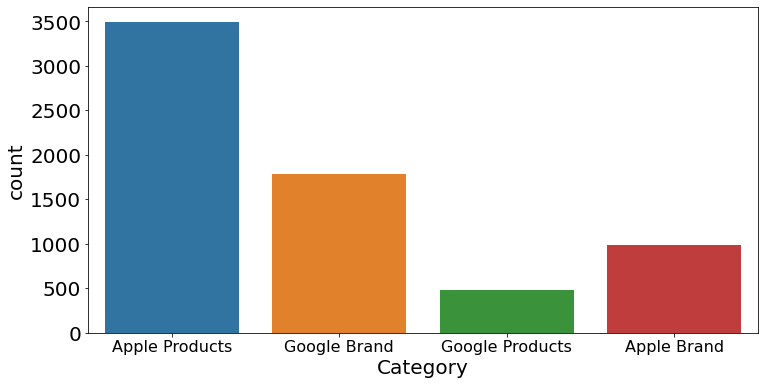

In [65]:
font = {'family' : 'DejaVu Sans',
            'weight' : 'normal',
            'size'   : 16}
plt.rc('font', **font)
plt.figure(figsize=(12,6))
plt.rc('axes', labelsize=20) 
plt.rc('ytick', labelsize=20) 
sns.countplot(x = 'Category', data = df);

Before moving on, I don't need most of these columns now. Many of the columns have been created exclusively to categorize the tweets. Now that the categorization is complete, I no longer need these columns. Also, I no longer need the given Products column. So now I'll trim the DataFrame to only the columns I need for NLP Analysis.

In [66]:
df.columns

Index(['Tweet', 'Product', 'Emotion', 'Tokens', 'Tokens With Hashtags',
       'Hashtags', 'Apple', 'iPad', 'iPad1', 'iPad2', 'iPhone', 'iTunes',
       'iPhone5', 'iTune', 'Laptop', 'Apple_Store', 'App_Store', 'iOS',
       'Macbook', 'iPad_App', 'iPhone_App', 'Pop_Up', 'iMac', 'Google',
       'Marissa_Mayer', 'MarissaGoogle', 'Googlecom', 'Android', 'Droid',
       'Circles', 'Blogger', 'Chrome', 'Samsung', 'Galaxy', 'Maps',
       'GoogleDoodle', 'ChromeOS', 'Googlecircles', 'Googletv', 'Android_App',
       'Company', 'Company by Product', 'Pd-Cp Match', 'Apple Keyword',
       'Google Keyword', 'Keywords', 'Category'],
      dtype='object')

In [67]:
df = df.loc[:, ['Tweet', 'Emotion', 'Tokens', 'Tokens With Hashtags',
                'Hashtags', 'Keywords', 'Company', 'Category']].copy()

df[['Tweet', 'Category']].head()

Tweet  \
0                 .@wesley83 i have a 3g iphone. after 3 hrs tweeting at #rise_austin, it was dead!  i need to upgrade. plugin stations at #sxsw.   
1  @jessedee know about @fludapp ? awesome ipad/iphone_app that you will likely appreciate for its design. also, they are giving free ts at #sxsw   
2                                                                  @swonderlin can not wait for #ipad2 also. they should sale them down at #sxsw.   
3                                                             @sxsw i hope this year's festival is not as crashy as this year's iphone_app. #sxsw   
4             @sxtxstate great stuff on fri #sxsw: marissa_mayer (google), tim_o_reilly (tech books/conferences) &amp; matt_mullenweg (wordpress)   

         Category  
0  Apple Products  
1  Apple Products  
2  Apple Products  
3  Apple Products  
4    Google Brand

## Creating Targets
Now that I have the data I want, I need to set some targets for each. As stated earlier, There will be twelve targets:

1. Company: Google or Apple
2. Aspect of Company: Brand or Product
3. Emotion: Positive, Negative, or Neutral

The emotion classification doesn't need any work done on it because it came ready to go. However, I had forgotten that "Indecipherable" is still an emotion label. After all the deletions, there are still 130 tweets with the unusable emotion label. I'll delete those.

In [68]:
print('Emotion labeled "' + "Indecipherable" + '" count: ',
      len(df.loc[df['Emotion'] == "Indecipherable"]))

#Dropping rows with no emotion known.
df.drop(index=df.loc[df['Emotion'] == "Indecipherable"].index, inplace=True)

#Resetting the dataset's index. (last deletion and reset)
df.reset_index(drop=True, inplace=True)

print('Purged this emotion label from the dataset.\nChecking:')
print('Emotion labeled "' + "Indecipherable" + '" count: ',
      len(df.loc[df['Emotion'] == "Indecipherable"]))

Emotion labeled "Indecipherable" count:  130
Purged this emotion label from the dataset.
Checking:
Emotion labeled "Indecipherable" count:  0


Now it's finally time to assign each tweet a target and target number.

Natural Language Processing is a statistical process that converts the corpus into numerical data, and then tries to correlate this numerical data to the target number. I point this out now to clarify that it must be a number, and not text. Therefore, each of the tweve targets will be assigned the numbers 0-11, as the models require. Since I have each tweet labeled with an emotion and a company-product/brand category, I'll use simple arithmatic to set up the numerical labels. 

In [69]:
emotion_num = {'Negative': 0, 'Neutral': 1, 'Positive': 2}

category_num = {
    'Apple Brand': 0,
    'Apple Products': 3,
    'Google Brand': 6,
    'Google Products': 9
    }

def emotion_columns(dfone):
    #This for loop will label three columns.
    dfone['Target Text'] = ''
    dfone['Target'] = 0
    for i in range(len(dfone)):
        if (dfone.loc[i, 'Company'] != 'Unknown') & (
        dfone.loc[i, 'Company'] != 'Both') & (
        dfone.loc[i, 'Emotion'] != "Indecipherable"):
            dfone.loc[i,'Target Text'] = dfone.loc[
                      i, 'Emotion'] + ' - ' + dfone.loc[i, 'Category']
            dfone.loc[i, 'Target'] = (emotion_num[dfone.loc[i, 'Emotion']] +
                                     category_num[dfone.loc[i, 'Category']])
    return dfone.copy()

df = emotion_columns(df)
    
target_count = df.groupby('Target Text').count()[
    'Tweet'].reset_index().sort_values(by='Tweet',ascending=False)
target_count.rename(columns={'Tweet' : 'Count'},inplace=True)
target_count.style.background_gradient(cmap='Spectral')


In [70]:
temp = df.groupby('Target Text').count()[
    'Tweet'].reset_index().sort_values(by='Tweet',ascending=False)
temp.style.background_gradient(cmap='Reds')

In [71]:
fig = go.Figure(go.Funnelarea(
    text =target_count['Target Text'],
    values = target_count['Count'],
    title = {"position": "top center", "text":
             "Funnel-Chart of Targets"}
    ))
fig.layout.update(showlegend=False)
fig.show()

## Removing Stopwords
Now that I've got the official targets and numbers, I will remove stopwords and see what the word distribution is like for the remaining tokens.

The reason removing stopwords is critical to the NLP process is an excess of simple pronouns and to-be verbs clutters the NLP output with definition-free words that don't direct the model well. The standard procedure is to remove them.

During the search for compound nouns, I found several odd tokens that needed deletion entirely. I made this list.

The first five words make sense, the rest is some kind of nonsense from the scraping process of twitter. For the first five, here is why they need to be deleted:

**Mention:** Deleted because it represents any of thousands of twitter handles.

**rt:** A sign that it is not the author's tweet, not part of the author's sentence.

**quot:** Represents punctuation, not a word.

**link:** Signifies the tweet had a links. These represent anything.

**amp** Signifies an ampersand. "And" is stopword regardless.

In [72]:
#Downloading the standard stopword list
nltk.download('stopwords', quiet=True)

stopwords_list = stopwords.words('english')

In [73]:
#Additional stopwords
stopwords_list.extend(['mention', 'rt', 'quot', 'link', 'amp',
                       'ûó', 'ûò', 'ûï', 'û_', 'ã_', 'ûª', 'åç', 'åè', 'ä_',
                       'â_', 'dì'])

In [74]:
# Returns a token list without the list of specified stopwords.

def remove_stopwords(token_list, stop_list):
    """
    Given a list of tokens, return a list where the tokens
    that are also present in stopwords_list have been
    removed
    """
    stopwords_removed = [
        token for token in token_list if token not in stop_list
    ]
    return stopwords_removed

In [75]:
def trim_stopwords(dfone):
    dfone.insert(2, 'Tidy Tweet', '')
    dfone.insert(5, 'Tokens Without Stopwords', '')
    dfone["Tokens Without Stopwords"] = dfone[
        "Tokens"].map(lambda x : remove_stopwords(x, stopwords_list))
    for ind in dfone.index:
        dfone.loc[ind, 'Tidy Tweet'] = " ".join(i
                            for i in dfone.loc[ind, 'Tokens Without Stopwords'])
    return dfone.copy()

df = trim_stopwords(df)

df[['Tweet', 'Tidy Tweet']].head()

Tweet  \
0                 .@wesley83 i have a 3g iphone. after 3 hrs tweeting at #rise_austin, it was dead!  i need to upgrade. plugin stations at #sxsw.   
1  @jessedee know about @fludapp ? awesome ipad/iphone_app that you will likely appreciate for its design. also, they are giving free ts at #sxsw   
2                                                                  @swonderlin can not wait for #ipad2 also. they should sale them down at #sxsw.   
3                                                             @sxsw i hope this year's festival is not as crashy as this year's iphone_app. #sxsw   
4             @sxtxstate great stuff on fri #sxsw: marissa_mayer (google), tim_o_reilly (tech books/conferences) &amp; matt_mullenweg (wordpress)   

                                                                                                         Tidy Tweet  
0                                wesley83 3g iphone hrs tweeting rise_austin dead need upgrade plugin stations sxsw  
1                   jessedee know fludapp awesome ipad iphone_app likely appreciate design also giving free ts sxsw  
2                                                                              swonderlin wait ipad2 also sale sxsw  
3                                                               sxsw hope year festival crashy year iphone_app sxsw  
4  sxtxstate great stuff fri sxsw marissa_mayer google tim_o_reilly tech books conferences matt_mullenweg wordpress

## Stemmer Tokens

Stemming the tokens involves eliminating the normal suffixes of the English language. For instance, instead of the NLP model considering the words "snowballs" and "snowball" as separate words, the stemmer trims the "s" off "snowballs", thus they are computed as the same word.

For stemming, I will use the standard snowball stemmer. I'll use the stemmed tokens for the modeling and association portions of the project below.

In [76]:
stemmer = SnowballStemmer(language="english")

def stem_and_tokenize(document):
    tokens = tokenizer.tokenize(document)
    return [stemmer.stem(token) for token in tokens]

In [77]:
# The stopwords themselves needed to be stemmed.
stemmed_stopwords = [stemmer.stem(word) for word in stopwords_list]

In [78]:
def stem_tokens(dfone):
    dfone.insert(3, 'Stemmed Tweet', '')
    dfone.insert(7, 'Stemmed Tokens', '')
    dfone["Stemmed Tokens"] = dfone['Tokens Without Stopwords'].apply(
        lambda x: [stemmer.stem(i) for i in x])
    dfone["Stemmed Tokens"] = dfone[
        "Stemmed Tokens"].map(lambda x : remove_stopwords(x,stemmed_stopwords))
    # The stemmer got overzealous with some of the keywords. This fixes that.
    fix_list = {'appl' : 'apple', 'googl' : 'google', 'iphon': 'iphone',
                'apple_stor' : 'apple_store', 'circl': 'circles',
                'marissa_may' : 'marissa_mayer', 'itun' : 'itunes',
                'app_stor' : 'app_store', 'io' : 'ios', 
                'marissagoogl' : 'marissagoogle', 'map' : 'maps',
                'googledoodl' : 'googledoodle', 'chromeo' : 'chromeos',
                'googlecircl' : 'googlecircles'}
    for i in dfone["Stemmed Tokens"].index:
        for j in range(len(dfone.loc[i, "Stemmed Tokens"])):
            for fix in fix_list:
                if dfone.loc[i, "Stemmed Tokens"][j] == fix:
                    dfone.loc[i, "Stemmed Tokens"][j] = fix_list[fix]
                
    for ind in dfone.index:
        dfone.loc[ind, 'Stemmed Tweet'] = " ".join(i
                            for i in dfone.loc[ind, 'Stemmed Tokens'])
    return dfone.copy()

df = stem_tokens(df)

df.loc[0:4,['Tokens Without Stopwords', 'Stemmed Tokens']]

Tokens Without Stopwords  \
0                                 [wesley83, 3g, iphone, hrs, tweeting, rise_austin, dead, need, upgrade, plugin, stations, sxsw]   
1                  [jessedee, know, fludapp, awesome, ipad, iphone_app, likely, appreciate, design, also, giving, free, ts, sxsw]   
2                                                                                     [swonderlin, wait, ipad2, also, sale, sxsw]   
3                                                                    [sxsw, hope, year, festival, crashy, year, iphone_app, sxsw]   
4  [sxtxstate, great, stuff, fri, sxsw, marissa_mayer, google, tim_o_reilly, tech, books, conferences, matt_mullenweg, wordpress]   

                                                                                                             Stemmed Tokens  
0                                [wesley83, 3g, iphone, hrs, tweet, rise_austin, dead, need, upgrad, plugin, station, sxsw]  
1                     [jessede, know, fludapp, awesom, ipad, iphone_app, like, appreci, design, also, give, free, ts, sxsw]  
2                                                                               [swonderlin, wait, ipad2, also, sale, sxsw]  
3                                                                [sxsw, hope, year, festiv, crashi, year, iphone_app, sxsw]  
4  [sxtxstate, great, stuff, fri, sxsw, marissa_mayer, google, tim_o_reilli, tech, book, confer, matt_mullenweg, wordpress]

## Frequency Distributions

Now I'll display the word frequencies for the dataset after the the tweets have been stemmed. First, I'll make a graph of all the words.

In [79]:
temp_sw = df[['Tweet', 'Stemmed Tweet']].copy()
temp_sw['Temp'] = temp_sw['Stemmed Tweet'].apply(lambda x:str(x).split())

temp_count_sw = Counter([
    item for sublist in temp_sw['Temp'] for item in sublist])
temp_counts_sw = pd.DataFrame(temp_count_sw.most_common(20))
temp_counts_sw.columns = ['Common Words','Count']

fig = px.bar(temp_counts_sw, x="Count", y="Common Words",
             title='Common Words in Stem Tokens',
             orientation='h', 
             width=600, height=600, color='Common Words')
fig.layout.update(showlegend=False)
fig.show()

These next three functions allow easy creation of a top ten visual showing the frequency of the words in the dataset.

In [80]:
# Returns a visualization of the distribution of the top ten words in the
# specified data.
def visualize_top_10(freq_dist, title):

    # Extract data for plotting
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    # Set up plot and plot data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)

In [81]:
# Sets up twelve subplots. This is used with other functions.

def setup_twelve_subplots():
    fig = plt.figure(figsize=(9, 12))
    fig.set_tight_layout(True)
    gs = fig.add_gridspec(4, 3)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 2])
    ax4 = fig.add_subplot(gs[1, 0])
    ax5 = fig.add_subplot(gs[1, 1])
    ax6 = fig.add_subplot(gs[1, 2])
    ax7 = fig.add_subplot(gs[2, 0])
    ax8 = fig.add_subplot(gs[2, 1])
    ax9 = fig.add_subplot(gs[2, 2])
    ax10 = fig.add_subplot(gs[3, 0])
    ax11 = fig.add_subplot(gs[3, 1])
    ax12 = fig.add_subplot(gs[3, 2])
    return fig, [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]

In [82]:
# Sets up twelve word frequency distributions for all target categories.
def plots(dataf, targ, column, axes, title="Word Frequency for"):
    ax_num = 0
    
    # Creating a DataFrame of just the target text with their target number as
    # the index.
    df_target = pd.DataFrame()

    for index, category in zip(dataf['Target'].unique(),
                               dataf['Target Text'].unique()):
        df_target.loc[index, 'Target Text'] = category

    df_target = df_target.sort_index()
    
    for index, category in zip(df_target.index, df_target.values):
        # Calculate frequency distribution for this subset
        all_words = dataf[targ == index][column].explode()
        freq_dist = FreqDist(all_words)
        top_10 = list(zip(*freq_dist.most_common(10)))
        tokens = top_10[0]
        counts = top_10[1]

        # Set up plot
        ax = axes[ax_num]
        ax.bar(tokens, counts)

        # Customize plot appearance
        ax.set_title(f"{title} \n {str(category)[2:-2]}")
        ax.set_ylabel("Count")
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.tick_params(axis="x", rotation=90)
        ax_num += 1

Now, I'll split the word distributions up into twelve distribution plots, one per target, showing the top ten for each.

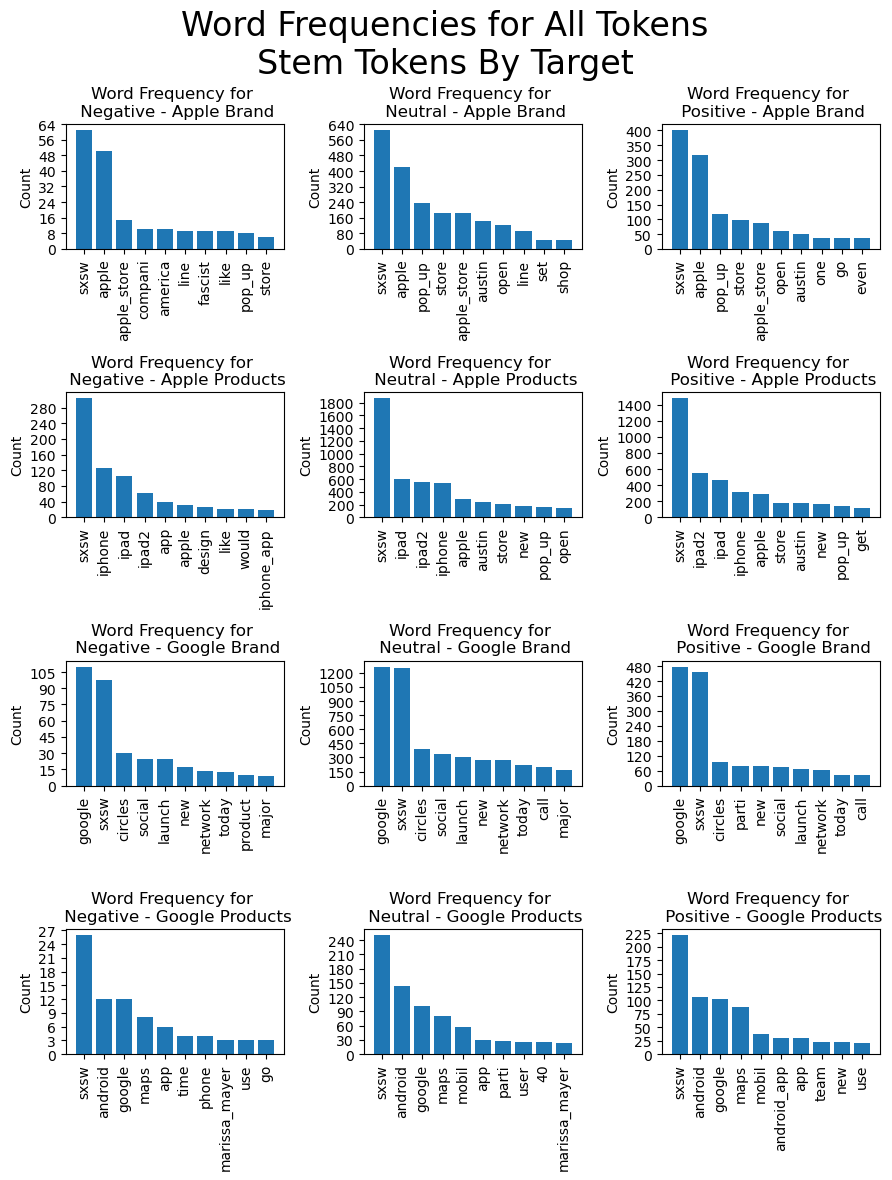

In [83]:
# Returning font sizes to their default.
plt.rcParams.update(plt.rcParamsDefault)

# Printing a grid of the word frequencies.
fig, axes = setup_twelve_subplots()
plots(df, df['Target'], "Stemmed Tokens", axes)
fig.suptitle("Word Frequencies for All Tokens\nStem Tokens By Target",
             fontsize=24);

These next two functions print word clouds, and also twelve word clouds, one for each target.

In [84]:
# Plots a single word cloud for the specified data.

def wc(tokens, title='', re = r"(?:\w[\w']+)"):
    if isinstance(tokens, pd.Series):
        text = " ".join(i for i in tokens.explode())
    else:
        text = " ".join(i for i in tokens)
    wordcloud = WordCloud(background_color="white", regexp = re).generate(text)
    fig = plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    fig.set_tight_layout(True)

    if title != '':
        fig.suptitle(title, fontsize=48)
    plt.show()

In [85]:
# Plots twelve word clouds for each specified target.

def word_cloud_grid(dataf, targ, column, title=''):
    tgt_lst = []
    wc_lst = []
    # Creating a DataFrame of just the target text with their target number as
    # the index.
    df_target = pd.DataFrame()
    for index, category in zip(dataf['Target'].unique(),
                               dataf['Target Text'].unique()):
        df_target.loc[index, 'Target Text'] = category
    df_target = df_target.sort_index()

    tgt_num = list(df_target.index)

    for num in tgt_num:
        tgt_lst.append(" ".join(
            i for i in dataf[column].loc[targ == num].explode()))
    for tgt in tgt_lst:
        wc_lst.append(WordCloud(background_color="white").generate(tgt))
    fig = plt.figure(figsize=(9, 9))
    fig.set_tight_layout(True)
    gs = fig.add_gridspec(4, 3)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 2])
    ax4 = fig.add_subplot(gs[1, 0])
    ax5 = fig.add_subplot(gs[1, 1])
    ax6 = fig.add_subplot(gs[1, 2])
    ax7 = fig.add_subplot(gs[2, 0])
    ax8 = fig.add_subplot(gs[2, 1])
    ax9 = fig.add_subplot(gs[2, 2])
    ax10 = fig.add_subplot(gs[3, 0])
    ax11 = fig.add_subplot(gs[3, 1])
    ax12 = fig.add_subplot(gs[3, 2])

    i = 0
    for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]:
        ax.axis("off")
        ax.imshow(wc_lst[i], interpolation='bilinear')
        ref = tgt_num[i]
        ax.set_title(f"Word Cloud \n {df_target.loc[ref,'Target Text']}")
        i += 1
    if title != '':
        fig.suptitle(title, fontsize=36)
    plt.show()

Since word clouds are so neat, here's a word cloud for all the stem tokens.

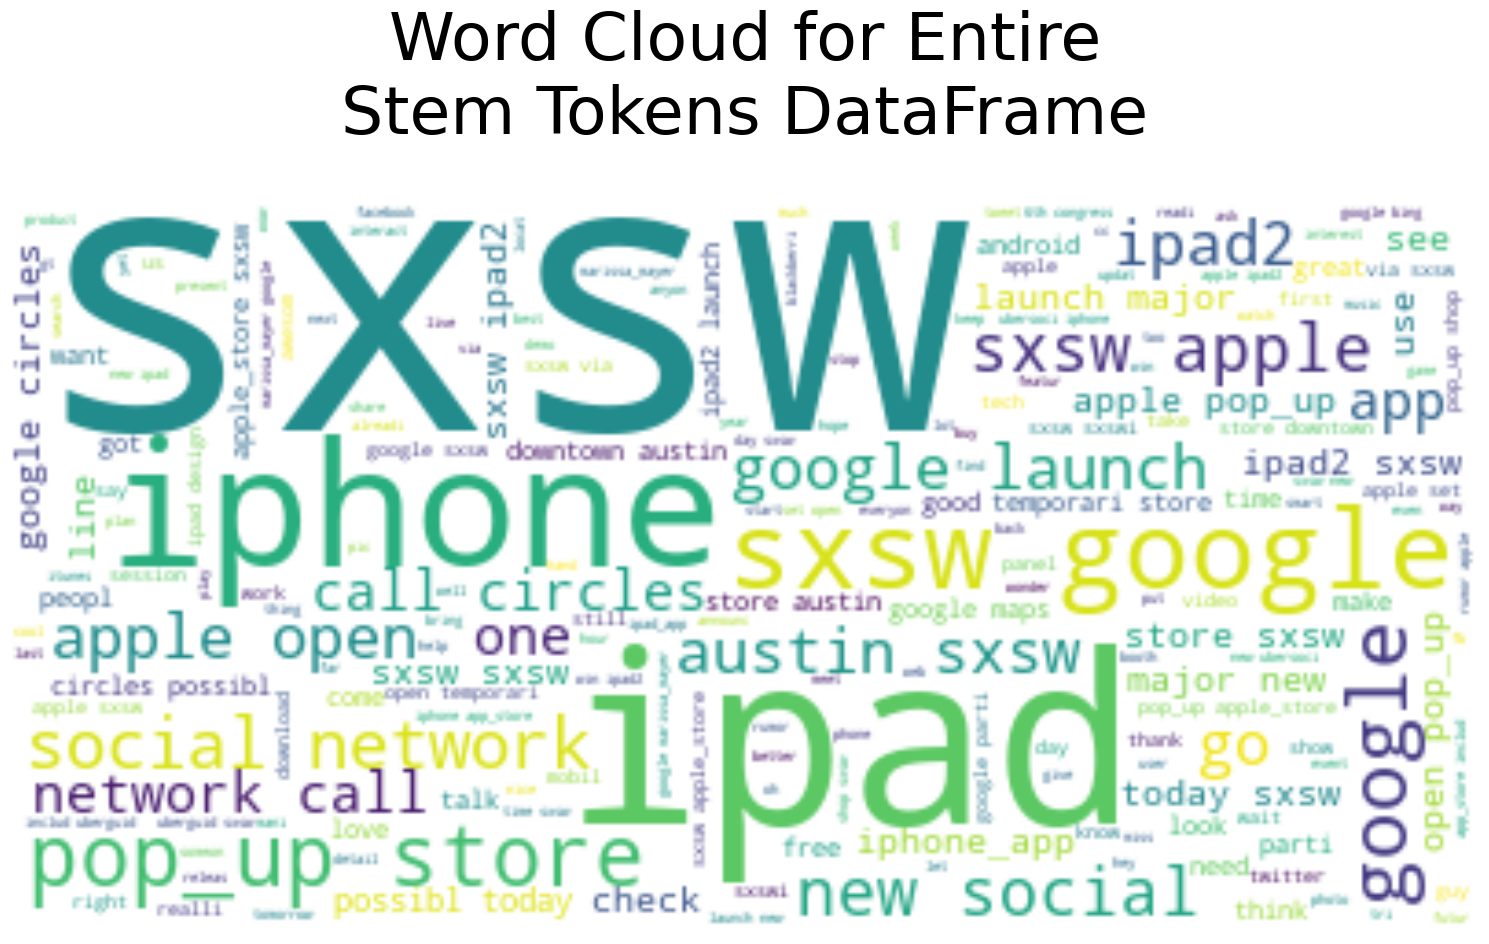

In [86]:
wc(df['Stemmed Tokens'],
   title="Word Cloud for Entire\nStem Tokens DataFrame")

Finally, here is a word cloud for each of the twelve targets.

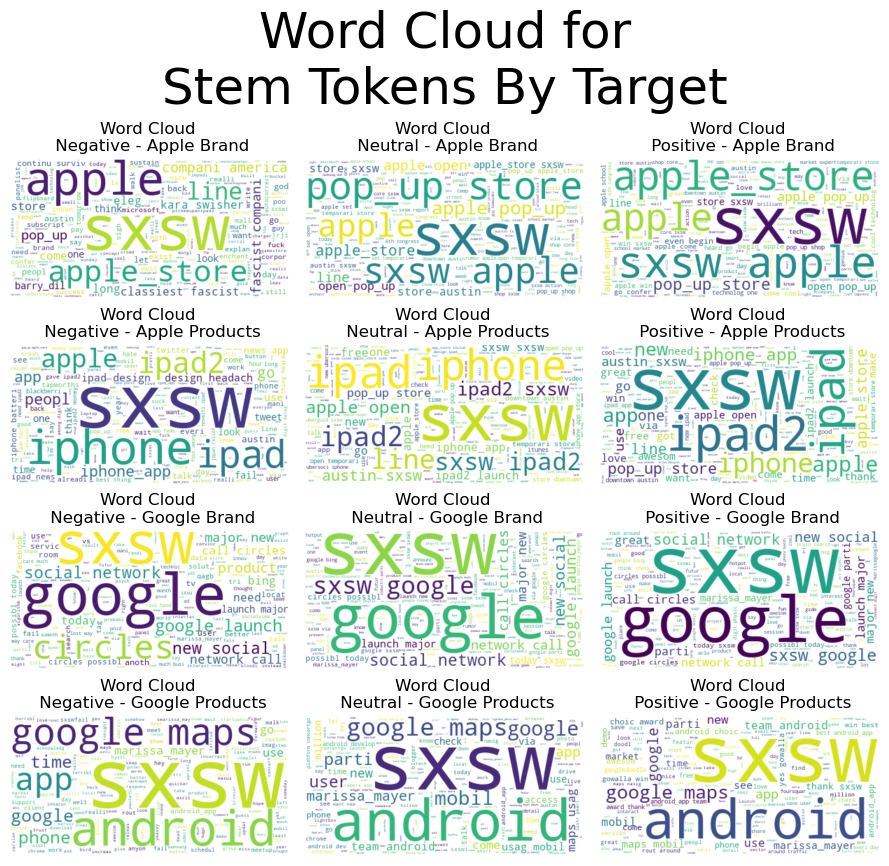

In [87]:
word_cloud_grid(df, df['Target'], 'Stemmed Tokens',
                title = "Word Cloud for\nStem Tokens By Target")

# In the morning Start Here

Things to do:

1. Add some verbage to the train and test set section
2. Add verbage to the vectorization section
3. Add verbage to the Word2Vec associations section
4. Double Check the association lists
5. Add a count graphic showing how often each associated word winds up in a tweet with the word that it's associated with.
6. Add verbage to the model section, describing each
7. Check GridSearchCV
8. Come up with a conclusion. 
9. #deleteme

## Splitting the data into Train and Test sets
This is the last stop before I begin vectorization and modeling.

I will use the 80/20 split for Train vs Test sets of data. I will split each target listed above by this same ratio.

In [88]:
#Creating the Test/Train split
xtrain, xtest, ytrain, ytest = train_test_split(df.iloc[:, 0:-1],
                                                    df.iloc[:, -1],
                                                    train_size=.8,
                                                    random_state=42)

I'm paranoid that the function will somehow pick few of one of the less common targets and then won't recognize it in the test. So I will test to see how close the ratio between train/test split is to the specified 0.8 train size for each target.

In [89]:
for targ in range(len(ytrain.unique())):
    train_size = ytrain.value_counts()[targ]
    test_size = ytest.value_counts()[targ]
    train_perc = round(train_size / (train_size + test_size), 3)
    print(targ, '-', train_perc)
    
    #comeback here

0 - 0.717
1 - 0.752
2 - 0.778
3 - 0.815
4 - 0.812
5 - 0.795
6 - 0.786
7 - 0.813
8 - 0.795
9 - 0.792
10 - 0.852
11 - 0.785


I'm impressed. This is nigh perfect. I'll trust this function more in the future.

# Building Vectorization Techniques
For this NLP analysis, I will test three vectorization methods against five different models. 

Vectorization Techniques:
1. TF-IDF
2. Bag-Of-Words
3. Word2Vec

The models:
1. Multinomial Naive Bayes
2. Logistic Regression
3. Support Vector Machine
4. RandomForest
5. XGBoost

## Build TF-IDF Vectorizer and Evaluate it with a Baseline Model, Multinomial Naive Bayes

Now, I'm going to construct the first vectorizer, TfidVectorizer, and test different options using the model MultinomialNB and K-fold Cross Validation. The goal in this section is to find the best options for the TfidVectorizer. I will vectorize the corpus with four different options:
1. No special options.
2. Removing Stopwords
3. Removing Stems
4. Tweaking maximum features

### Basic TF-IDF vectorizer

In [90]:
# To avoid meticulous editting, I will use this cell to define the text and
# tokens to be used in the vectorization and modeling below. Changing this cell
# will change the results below.
modstr = 'Stemmed Tweet'  #String to model
modtok = 'Stemmed Tokens' #Tokens to model

In [91]:
# Instantiate a vectorizer with max_features=10
# Default token pattern
tfidf = TfidfVectorizer(max_features=10)

# Fit the vectorizer on xtrain["text"] and transform it
xtrain_tfidf = tfidf.fit_transform(xtrain['Tweet'])

pd.set_option('display.precision', 5)

In [92]:
#Testing to see if the data is in the correct format
assert xtrain_tfidf.shape[0] == xtrain.shape[0]
assert xtrain_tfidf.shape[1] == 10

In [93]:
# Instantiate a MultinomialNB classifier
baseline_model = MultinomialNB()

# Evaluate the classifier on xtrain_tfidf and ytrain
baseline_cv = cross_val_score(baseline_model, xtrain_tfidf, ytrain)
baseline_cv

array([0.44381492, 0.44664778, 0.45042493, 0.44570349, 0.44664778])

In [94]:
ytrain.value_counts(normalize=True)

4    0.266
5    0.210
7    0.185
1    0.078
8    0.067
2    0.053
3    0.045
10   0.038
11   0.032
6    0.015
0    0.008
9    0.004
Name: Target, dtype: float64

Using K-fold Cross Validation Scores five times with the Multinomial Naive Bayes classifier yields accurate classifier predictions of around 40%. This is better than randomly guessing each value as the class 4 Neutral Apple Product classifier. There's room for improvement.

### TF-IDF vectorizer with Stopwords Removed

In [95]:
def to_tokens(document):
    tokens = tokenizer.tokenize(document)
    return [token for token in tokens]

In [96]:
tfidf = TfidfVectorizer(max_features = 10, 
                        tokenizer = to_tokens,
                        stop_words = stopwords_list,
                        token_pattern=None)

# Fit the vectorizer on xtrain["text"] and transform it
xtrain_tfidf = tfidf.fit_transform(xtrain["Tweet"])

# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(xtrain_tfidf,
                                  columns=tfidf.get_feature_names_out()).head()

apple  austin  google  ipad  ipad2  iphone   new  pop_up  store  sxsw
0  0.000   0.000   0.912 0.000  0.000   0.000 0.000   0.000  0.000 0.410
1  0.000   0.000   0.000 0.000  0.941   0.000 0.000   0.000  0.000 0.339
2  0.000   0.000   0.000 0.000  0.000   0.000 0.000   0.000  0.000 1.000
3  0.000   0.000   0.000 0.666  0.000   0.705 0.000   0.000  0.000 0.242
4  0.000   0.000   0.912 0.000  0.000   0.000 0.000   0.000  0.000 0.410

In [97]:
# Evaluate the classifier on xtrain_tfidf and ytrain
stopwords_removed_cv = cross_val_score(baseline_model, xtrain_tfidf,
                                       ytrain)
stopwords_removed_cv

array([0.50047214, 0.496695  , 0.50802644, 0.50236072, 0.50047214])

In [98]:
# Now I'll see how the two models compare.
print("Baseline:         ", baseline_cv.mean())
print("Stopwords removed:", stopwords_removed_cv.mean())

Baseline:          0.44664778092540136
Stopwords removed: 0.5016052880075542


Removing a standard list of stop words actually caused a slight increase in the model's accuracy. Let's see what happens when I get rid of my own set of stopwords.

### TF-IDF vectorizer with Stemmed Stopwords Removed

In [99]:
tfidf = TfidfVectorizer(max_features=10,
                        stop_words = stemmed_stopwords,
                        tokenizer = stem_and_tokenize,
                        token_pattern=None)

# Fit the vectorizer on xtrain["text"] and transform it
xtrain_tfidf = tfidf.fit_transform(xtrain["Tweet"])

In [100]:
stemmed_cv = cross_val_score(baseline_model, xtrain_tfidf, ytrain)
stemmed_cv

array([0.50047214, 0.49480642, 0.50802644, 0.50236072, 0.50047214])

In [101]:
print("Baseline:         ", baseline_cv.mean())
print("Stopwords removed:", stopwords_removed_cv.mean())
print("Stemmed:          ", stemmed_cv.mean())

Baseline:          0.44664778092540136
Stopwords removed: 0.5016052880075542
Stemmed:           0.5012275731822473


Relatively flat. Now I'll try increasing the max features to the maximum number of tokens.

### TF-IDF Vectorizer with tweaked Max Features

I like to test things to see what yields the highest possible value. Below, I test which maximum features is best for Multinomial Naives Bayes.

In [102]:
if modstr == 'Tidy Tweet':
    stops = stopwords_list
    izer = to_tokens
if modstr == 'Stemmed Tweet':
    stops = stemmed_stopwords
    izer = stem_and_tokenize

tfidf = TfidfVectorizer(
    max_features = 77,
    tokenizer = izer,
    stop_words = stops,
    token_pattern=None
)

# Fit the vectorizer on xtrain["text"] and transform it
xtrain_tfidf = tfidf.fit_transform(xtrain["Tweet"])
xtest_tfidf = tfidf.fit_transform(xtest["Tweet"])

In [103]:
max_features = cross_val_score(baseline_model, xtrain_tfidf, ytrain)
max_features

array([0.5694051 , 0.58073654, 0.56751653, 0.55807365, 0.54202077])

In [104]:
print("Baseline:         ", baseline_cv.mean())
print("Stopwords removed:", stopwords_removed_cv.mean())
print("Stemmed:          ", stemmed_cv.mean())
print("Max Features:     ", max_features.mean())
mnb_tfidf_xtrain_kfold = max_features

Baseline:          0.44664778092540136
Stopwords removed: 0.5016052880075542
Stemmed:           0.5012275731822473
Max Features:      0.5635505193578848


The max features is the best vectorization parameters for TF-IDF. I'll use that one during the modeling process.

## Build Bag-Of-Words Vectorizer

In [105]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2,
                                 max_features=10000,
                                 stop_words = stopwords_list)
df_bow = bow_vectorizer.fit_transform(df[modstr])
xtrain_bow = df_bow[ytrain.index]
xtest_bow  = df_bow[ytest.index]
print(xtrain_bow.shape, xtest_bow.shape)

(5295, 3431) (1324, 3431)


In [106]:
mnb_bow_xtrain_kfold = cross_val_score(baseline_model, xtrain_bow, ytrain)
mnb_bow_xtrain_kfold

array([0.57034939, 0.61000944, 0.60434372, 0.59206799, 0.59773371])

In [107]:
print("TF-IDF:           ", mnb_tfidf_xtrain_kfold.mean())
print('Bag Of Words:     ', mnb_bow_xtrain_kfold.mean())

TF-IDF:            0.5635505193578848
Bag Of Words:      0.5949008498583568


## Build Word2Vec Vectorizer

In [108]:
vsize = 782
def word2vec_model(tokens):
    model = gensim.models.Word2Vec(
        tokens, #Panda series of lists with word tokens in it.
        vector_size = vsize,  # desired no. of features/independent variables
        window=5,  # context window size
        min_count=1,  # Ignores all words with total frequency lower than 2.
        sg=1,  # 1 for skip-gram model
        hs=0,
        negative=10,  # for negative sampling
        workers=32,  # no.of cores
        seed=34)
    model.train(tokens, total_examples=len(tokens), epochs=20)
    return model

model_w2v_df = word2vec_model(df[modtok])

In [109]:
def word_vector(model, tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model.wv[word].reshape(1, size)
            count += 1
        except KeyError:  # handling the case where the token is not in
            continue      # vocabulary
    if count != 0:
        vec /= count
    return vec

In [110]:
def word2Vec(tokens, vector_size):
    wordvec_arrays = np.zeros((len(tokens), vector_size))
    array_index = 0
    for i in tokens.index:
        wordvec_arrays[array_index, :] = word_vector(model_w2v_df,
                                                     tokens[i], vector_size)
        array_index += 1
    wordvec_df = pd.DataFrame(wordvec_arrays)
    print('Word2Vec Shape:', wordvec_df.shape)
    
    #PredictorScaler=StandardScaler()
    PredictorScaler = MinMaxScaler()

    # Storing the fit object for later reference
    PredictorScalerFit = PredictorScaler.fit(wordvec_df)

    # Generating the standardized values of X
    wordvec_norm = PredictorScalerFit.transform(wordvec_df)
    
    return wordvec_df, wordvec_norm

In [111]:
print('X-Train Word2Vec:')
xtrain_w2v, xtrain_w2v_norm = word2Vec(xtrain[modtok],
                                        vsize)

print('X-Test Word2Vec:')
xtest_w2v, xtest_w2v_norm = word2Vec(xtest[modtok],
                                        vsize)

X-Train Word2Vec:
Word2Vec Shape: (5295, 782)
X-Test Word2Vec:
Word2Vec Shape: (1324, 782)


In [112]:
mnb_w2v_xtrain_kfold = cross_val_score(baseline_model,
                                        xtrain_w2v_norm, ytrain)
mnb_w2v_xtrain_kfold

array([0.45136922, 0.45325779, 0.44853636, 0.47686497, 0.44759207])

In [113]:
print("TF-IDF:           ", mnb_tfidf_xtrain_kfold.mean())
print('Bag Of Words:     ', mnb_bow_xtrain_kfold.mean())
print('Word2Vec:         ', mnb_w2v_xtrain_kfold.mean())

TF-IDF:            0.5635505193578848
Bag Of Words:      0.5949008498583568
Word2Vec:          0.4555240793201133


## Doc2Vec #deleteme

from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import TaggedDocument #deleteme

def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

labeled_tweets = add_label(xtrain['Tokens Without Stopwords']) # label all the tweets
#deleteme

model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model
                                  dm_mean=1, 
                        # dm_mean = 1 for using mean of the context word vectors
                                  vector_size=200, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, 
                                  # if > 0 then negative sampling will be used
                                  min_count=5, 
                        # Ignores all words with total frequency lower than 5.
                                  workers=32, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23, # for reproducibility
                                 ) 
#deleteme

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
#deleteme

xtrain.loc[418,'Tidy Tweet']
#deleteme

model_d2v.train(xtrain.loc[418,'Tokens Without Stopwords'], total_examples= len(
    xtrain.loc[418,'Tidy Tweet']), epochs=1)
    
    #deleteme

The example gave the above epochs 15, not 1.
#deleteme

docvec_arrays = np.zeros((len(xtrain['Tokens Without Stopwords']), 200)) 
for i in xtrain.index:
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape
#deleteme

# Positive and Negative Word Associations

As I referenced earlier I wanted the ability to run the entire Jupyter Notebook's data cleaning process on the original raw data with some minor tweaks. The tweak is that I don't delete any of the retweets. This will be used as a comparison during word association.

Here is the dataframe with all the original values intact.

In [114]:
def retain(dforg):
    df_new = rename_columns(dforg)

    df_new = abbreviate_emotion(df_new)
        
    df_new['Tweet'] = df_new['Tweet'].str.lower()

    df_new.drop(index=6, inplace=True)
    df_new.reset_index(drop=True, inplace=True)

    df_new = string_replace(df_new, first_replace, replacements,
                            to_print = False)

    df_new = tokenize_columns(df_new)
        
    df_new, no_kw_new = keyword_labels(df_new, keywords_apple, keywords_google) 

    df_new = company_organization(df_new, keywords_apple, keywords_google)

    df_new = company_by_product(df_new)
    
    df_new = no_match(df_new)

    df_new = mismatch(df_new)
    
    inspect, no_kw_new = no_keywords(df_new, no_kw_new)
    
    apple_tweets_new = tweets_to_edit(no_kw_new, inspect, False)
    
    df_new, no_kw_new = apple_tweet_edit(df_new,
                                            no_kw_new, apple_tweets_new)
    
    df_new, no_kw_new = corrections(df_new, no_kw_new)
    
    df_new = categorize(df_new, keywords_apple, keywords_google)
        
    df_new = keyword_combos(df_new, keywords_apple, keywords_google)
 
    df_new = df_new.loc[:, ['Tweet', 'Emotion', 'Tokens', 'Hashtags',
                            'Keywords', 'Company', 'Category']].copy()

    df_new.reset_index(drop=True, inplace=True)
    
    df_new = emotion_columns(df_new)
    
    df_new = trim_stopwords(df_new)
    
    df_new = stem_tokens(df_new)
    
    model_w2v_df_new = word2vec_model(df_new[modtok])
    
    return df_new, model_w2v_df_new

df_retain, model_w2v_df_retain = retain(df_raw)

In [115]:
df_retain[[modstr, modtok, 'Hashtags',
           'Keywords', 'Target Text', 'Target']].head()

Stemmed Tweet  \
0                               wesley83 3g iphone hrs tweet rise_austin dead need upgrad plugin station sxsw   
1                      jessede know fludapp awesom ipad iphone_app like appreci design also give free ts sxsw   
2                                                                        swonderlin wait ipad2 also sale sxsw   
3                                                           sxsw hope year festiv crashi year iphone_app sxsw   
4  sxtxstate great stuff fri sxsw marissa_mayer google tim_o_reilli tech book confer matt_mullenweg wordpress   

                                                                                                             Stemmed Tokens  \
0                                [wesley83, 3g, iphone, hrs, tweet, rise_austin, dead, need, upgrad, plugin, station, sxsw]   
1                     [jessede, know, fludapp, awesom, ipad, iphone_app, like, appreci, design, also, give, free, ts, sxsw]   
2                                                                               [swonderlin, wait, ipad2, also, sale, sxsw]   
3                                                                [sxsw, hope, year, festiv, crashi, year, iphone_app, sxsw]   
4  [sxtxstate, great, stuff, fri, sxsw, marissa_mayer, google, tim_o_reilli, tech, book, confer, matt_mullenweg, wordpress]   

                Hashtags              Keywords                Target Text  \
0  [#rise_austin, #sxsw]                iPhone  Negative - Apple Products   
1                [#sxsw]       iPad iPhone_App  Positive - Apple Products   
2        [#ipad2, #sxsw]                 iPad2  Positive - Apple Products   
3                [#sxsw]            iPhone_App  Negative - Apple Products   
4                [#sxsw]  Google Marissa_Mayer    Positive - Google Brand   

   Target  
0       3  
1       5  
2       5  
3       3  
4       8

This is a behemoth of a DataFrame. It slices up the dataset into subsets representing each of the twelve categories. Each of the letters between the underscores is separated as such:

df/model = DataFrame or model

w2v = Word2Vec

neg/neu/pos = Negative, Neutral or Positive

ab/ap/gb/gp/a/g = Apple Brand, Apple Products, Google Brand, Google Products, Apple, Google

The different models and DataFrames are used for quick access to create visualizations.

In [116]:
# I'm curious if I'll get dramatically different answers if I run the Word2Vec
# Vectorization process separtley on DataFrames created exclusively for each
# target. Only one way to find out.

titles = {}

df_w2v_neg_ab = df.loc[df['Target Text'] == 'Negative - Apple Brand']
model_w2v_neg_ab = word2vec_model(df_w2v_neg_ab[modtok])
df_w2v_neg_ab.name = 'df_w2v_neg_ab'
model_w2v_neg_ab.name = 'model_w2v_neg_ab'
titles[model_w2v_neg_ab.name] = 'Negative - Apple Brand'
titles[df_w2v_neg_ab.name] = 'Negative - Apple Brand'

df_w2v_neu_ab = df.loc[df['Target Text'] == 'Neutral - Apple Brand']
model_w2v_neu_ab = word2vec_model(df_w2v_neu_ab[modtok])
df_w2v_neu_ab.name = 'df_w2v_neu_ab'
model_w2v_neu_ab.name = 'model_w2v_neu_ab'
titles[model_w2v_neu_ab.name] = 'Neutral - Apple Brand'
titles[df_w2v_neu_ab.name] = 'Neutral - Apple Brand'

df_w2v_pos_ab = df.loc[df['Target Text'] == 'Positive - Apple Brand']
model_w2v_pos_ab = word2vec_model(df_w2v_pos_ab[modtok])
df_w2v_pos_ab.name = 'df_w2v_pos_ab'
model_w2v_pos_ab.name = 'model_w2v_pos_ab'
titles[model_w2v_pos_ab.name] = 'Positive - Apple Brand'
titles[df_w2v_pos_ab.name] = 'Positive - Apple Brand'

df_w2v_neg_ap = df.loc[df['Target Text'] == 'Negative - Apple Products']
model_w2v_neg_ap = word2vec_model(df_w2v_neg_ap[modtok])
df_w2v_neg_ap.name = 'df_w2v_neg_ap'
model_w2v_neg_ap.name = 'model_w2v_neg_ap'
titles[model_w2v_neg_ap.name] = 'Negative - Apple Products'
titles[df_w2v_neg_ap.name] = 'Negative - Apple Products'

df_w2v_neu_ap = df.loc[df['Target Text'] == 'Neutral - Apple Products']
model_w2v_neu_ap = word2vec_model(df_w2v_neu_ap[modtok])
df_w2v_neu_ap.name = 'df_w2v_neu_ap'
model_w2v_neu_ap.name = 'model_w2v_neu_ap'
titles[model_w2v_neu_ap.name] = 'Neutral - Apple Products'
titles[df_w2v_neu_ap.name] = 'Neutral - Apple Products'

df_w2v_pos_ap = df.loc[df['Target Text'] == 'Positive - Apple Products']
model_w2v_pos_ap = word2vec_model(df_w2v_pos_ap[modtok])
df_w2v_pos_ap.name = 'df_w2v_pos_ap'
model_w2v_pos_ap.name = 'model_w2v_pos_ap'
titles[model_w2v_pos_ap.name] = 'Positive - Apple Products'
titles[df_w2v_pos_ap.name] = 'Positive - Apple Products'

df_w2v_neg_gb = df.loc[df['Target Text'] == 'Negative - Google Brand']
model_w2v_neg_gb = word2vec_model(df_w2v_neg_gb[modtok])
df_w2v_neg_gb.name = 'df_w2v_neg_gb'
model_w2v_neg_gb.name = 'model_w2v_neg_gb'
titles[model_w2v_neg_gb.name] = 'Negative - Google Brand'
titles[df_w2v_neg_gb.name] = 'Negative - Google Brand'

df_w2v_neu_gb = df.loc[df['Target Text'] == 'Neutral - Google Brand']
model_w2v_neu_gb = word2vec_model(df_w2v_neu_gb[modtok])
df_w2v_neu_gb.name = 'df_w2v_neu_gb'
model_w2v_neu_gb.name = 'model_w2v_neu_gb'
titles[model_w2v_neu_gb.name] = 'Neutral - Google Brand'
titles[df_w2v_neu_gb.name] = 'Neutral - Google Brand'

df_w2v_pos_gb = df.loc[df['Target Text'] == 'Positive - Google Brand']
model_w2v_pos_gb = word2vec_model(df_w2v_pos_gb[modtok])
df_w2v_pos_gb.name = 'df_w2v_pos_gb'
model_w2v_pos_gb.name = 'model_w2v_pos_gb'
titles[model_w2v_pos_gb.name] = 'Positive - Google Brand'
titles[df_w2v_pos_gb.name] = 'Positive - Google Brand'

df_w2v_neg_gp = df.loc[df['Target Text'] == 'Negative - Google Products']
model_w2v_neg_gp = word2vec_model(df_w2v_neg_gp[modtok])
df_w2v_neg_gp.name = 'df_w2v_neg_gp'
model_w2v_neg_gp.name = 'model_w2v_neg_gp'
titles[model_w2v_neg_gp.name] = 'Negative - Google Products'
titles[df_w2v_neg_gp.name] = 'Negative - Google Products'

df_w2v_neu_gp = df.loc[df['Target Text'] == 'Neutral - Google Products']
model_w2v_neu_gp = word2vec_model(df_w2v_neu_gp[modtok])
df_w2v_neu_gp.name = 'df_w2v_neu_gp'
model_w2v_neu_gp.name = 'model_w2v_neu_gp'
titles[model_w2v_neu_gp.name] = 'Neutral - Google Products'
titles[df_w2v_neu_gp.name] = 'Neutral - Google Products'

df_w2v_pos_gp = df.loc[df['Target Text'] == 'Positive - Google Products']
model_w2v_pos_gp = word2vec_model(df_w2v_pos_gp[modtok])
df_w2v_pos_gp.name = 'df_w2v_pos_gp'
model_w2v_pos_gp.name = 'model_w2v_pos_gp'
titles[model_w2v_pos_gp.name] = 'Positive - Google Products'
titles[df_w2v_pos_gp.name] = 'Positive - Google Products'

df_w2v_neg_a = df.loc[(df['Company'] == 'Apple') & 
                      (df['Emotion'] == 'Negative')]
model_w2v_neg_a = word2vec_model(df_w2v_neg_a[modtok])
df_w2v_neg_a.name = 'df_w2v_neg_a'
model_w2v_neg_a.name = 'model_w2v_neg_a'
titles[model_w2v_neg_a.name] = 'Negative - Apple (Products & Brand)'
titles[df_w2v_neg_a.name] = 'Negative - Apple (Products & Brand)'

df_w2v_neu_a = df.loc[(df['Company'] == 'Apple') & 
                      (df['Emotion'] == 'Neutral')]
model_w2v_neu_a = word2vec_model(df_w2v_neu_a[modtok])
df_w2v_neu_a.name = 'df_w2v_neu_a'
model_w2v_neu_a.name = 'model_w2v_neu_a'
titles[model_w2v_neu_a.name] = 'Neutral - Apple (Products & Brand)'
titles[df_w2v_neu_a.name] = 'Neutral - Apple (Products & Brand)'

df_w2v_pos_a = df.loc[(df['Company'] == 'Apple') & 
                      (df['Emotion'] == 'Positive')]
model_w2v_pos_a = word2vec_model(df_w2v_pos_a[modtok])
df_w2v_pos_a.name = 'df_w2v_pos_a'
model_w2v_pos_a.name = 'model_w2v_pos_a'
titles[model_w2v_pos_a.name] = 'Positive - Apple (Products & Brand)'
titles[df_w2v_pos_a.name] = 'Positive - Apple (Products & Brand)'

df_w2v_neg_g = df.loc[(df['Company'] == 'Google') & 
                      (df['Emotion'] == 'Negative')]
model_w2v_neg_g = word2vec_model(df_w2v_neg_g[modtok])
df_w2v_neg_g.name = 'df_w2v_neg_g'
model_w2v_neg_g.name = 'model_w2v_neg_g'
titles[model_w2v_neg_g.name] = 'Negative - Google (Products & Brand)'
titles[df_w2v_neg_g.name] = 'Negative - Google (Products & Brand)'

df_w2v_neu_g = df.loc[(df['Company'] == 'Google') & 
                      (df['Emotion'] == 'Neutral')]
model_w2v_neu_g = word2vec_model(df_w2v_neu_g[modtok])
df_w2v_neu_g.name = 'df_w2v_neu_g'
model_w2v_neu_g.name = 'model_w2v_neu_g'
titles[model_w2v_neu_g.name] = 'Neutral - Google (Products & Brand)'
titles[df_w2v_neu_g.name] = 'Neutral - Google (Products & Brand)'

df_w2v_pos_g = df.loc[(df['Company'] == 'Google') & 
                      (df['Emotion'] == 'Positive')]
model_w2v_pos_g = word2vec_model(df_w2v_pos_g[modtok])
df_w2v_pos_g.name = 'df_w2v_pos_g'
model_w2v_pos_g.name = 'model_w2v_pos_g'
titles[model_w2v_pos_g.name] = 'Positive - Google (Products & Brand)'
titles[df_w2v_pos_g.name] = 'Positive - Google (Products & Brand)'

In [117]:
apple_brand_wv =     [model_w2v_neg_ab,
                      model_w2v_neu_ab,
                      model_w2v_pos_ab]
apple_products_wv =  [model_w2v_neg_ap,
                      model_w2v_neu_ap,
                      model_w2v_pos_ap]
google_brand_wv =    [model_w2v_neg_gb,
                      model_w2v_neu_gb,
                      model_w2v_pos_gb]
google_products_wv = [model_w2v_neg_gp,
                      model_w2v_neu_gp,
                      model_w2v_pos_gp]
apple_both_wv =       [model_w2v_neg_a,
                      model_w2v_neu_a,
                      model_w2v_pos_a]
google_both_wv =      [model_w2v_neg_g,
                      model_w2v_neu_g,
                      model_w2v_pos_g]

apple_neg_wv =       [model_w2v_neg_ab,
                      model_w2v_neg_ap,
                      model_w2v_neg_a]
apple_neu_wv =       [model_w2v_neu_ab,
                      model_w2v_neu_ap,
                      model_w2v_neu_a]
apple_pos_wv =       [model_w2v_pos_ab,
                      model_w2v_pos_ap,
                      model_w2v_pos_a]
google_neg_wv =      [model_w2v_neg_gb,
                      model_w2v_neg_gp,
                      model_w2v_neg_g]
google_neu_wv =      [model_w2v_neu_gb,
                      model_w2v_neu_gp,
                      model_w2v_neu_g]
google_pos_wv =      [model_w2v_pos_gb,
                      model_w2v_pos_gp,
                      model_w2v_pos_g]


apple_all_wv = []
apple_all_wv.extend(apple_brand_wv)
apple_all_wv.extend(apple_products_wv)
apple_all_wv.extend(apple_both_wv)

google_all_wv = []
google_all_wv.extend(google_brand_wv)
google_all_wv.extend(google_products_wv)
google_all_wv.extend(google_both_wv)
all_wv = []
all_wv.extend(apple_all_wv)
all_wv.extend(google_all_wv)
all_wv.append(model_w2v_df_retain)
model_w2v_df_retain.name = 'model_w2v_df_retain'
df_retain.name = 'df_retain'
titles[model_w2v_df_retain.name] = 'Entire Dataset'
titles[df_retain.name] = 'Entire Dataset'
titles

{'model_w2v_neg_ab': 'Negative - Apple Brand',
 'df_w2v_neg_ab': 'Negative - Apple Brand',
 'model_w2v_neu_ab': 'Neutral - Apple Brand',
 'df_w2v_neu_ab': 'Neutral - Apple Brand',
 'model_w2v_pos_ab': 'Positive - Apple Brand',
 'df_w2v_pos_ab': 'Positive - Apple Brand',
 'model_w2v_neg_ap': 'Negative - Apple Products',
 'df_w2v_neg_ap': 'Negative - Apple Products',
 'model_w2v_neu_ap': 'Neutral - Apple Products',
 'df_w2v_neu_ap': 'Neutral - Apple Products',
 'model_w2v_pos_ap': 'Positive - Apple Products',
 'df_w2v_pos_ap': 'Positive - Apple Products',
 'model_w2v_neg_gb': 'Negative - Google Brand',
 'df_w2v_neg_gb': 'Negative - Google Brand',
 'model_w2v_neu_gb': 'Neutral - Google Brand',
 'df_w2v_neu_gb': 'Neutral - Google Brand',
 'model_w2v_pos_gb': 'Positive - Google Brand',
 'df_w2v_pos_gb': 'Positive - Google Brand',
 'model_w2v_neg_gp': 'Negative - Google Products',
 'df_w2v_neg_gp': 'Negative - Google Products',
 'model_w2v_neu_gp': 'Neutral - Google Products',
 'df_w2v_neu_g

These next three functions create a word clouds for a given word and slice of the dataset. 

In [118]:
# Checks to see if the word is in the give model, and returns the pair of 
# association tuple lists.

def word_association(mdl, wrd):
    if wrd not in mdl.wv.key_to_index:
        string = 'The word "' + wrd.capitalize() + '" is not in the model '
        string += titles[mdl.name]
        return  string, ''
    pos = mdl.wv.most_similar(positive=wrd)
    neg = mdl.wv.most_similar(negative=wrd)
    return pos, neg


In [119]:
# Creates a pair of clouds that that show the top ten positively and negatively
# associated word in the given association list of association tuples, the word
# and the title of the graph.

def word_assoc_cloud(pos_assoc, neg_assoc, word, title = '', subs = []):
    word_cap = word.capitalize()
    pos_lst = []
    neg_lst = []
    for i in range(len(pos_assoc)):
        pos_lst.append(pos_assoc[i][0])
        neg_lst.append(neg_assoc[i][0])
    pos_text = " ".join(i for i in pos_lst)
    neg_text = " ".join(i for i in neg_lst)
    wc_lst = []

    wc_lst.append(WordCloud(background_color="white").generate(pos_text))
    wc_lst.append(WordCloud(background_color="white").generate(neg_text))
    
    fig = plt.figure(figsize=(9, 4))
    fig.set_tight_layout(True)
    gs = fig.add_gridspec(1, 2)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    
    if subs == []:
        subtitles = ['Associated With '     + word_cap,
                     'Not Associated With ' + word_cap]
    else:
        subtitles = subs
    i = 0
    for ax in [ax1, ax2]:
        ax.spines['bottom'].set_color('0.5')
        ax.spines['top'].set_color('0.5')
        ax.spines['right'].set_color('0.5')
        ax.spines['left'].set_color('0.5')
        ax.patch.set_facecolor('0.1')
        ax.tick_params(axis='x', which='both', bottom = False, 
                       labelbottom = False)
        ax.tick_params(axis='y', which='both', left = False, 
                       labelleft = False)
        ax.yaxis.label.set_color('0.9')
        ax.xaxis.label.set_color('0.9')
        ax.margins(0.5)
        ax.imshow(wc_lst[i], interpolation='bilinear')
        ax.set_title(subtitles[i], fontsize=18)
        i += 1
    if title != '':
        fig.suptitle(title, fontsize=24)
    plt.show()

In [120]:
# Creates a word cloud graphic and lists underneath the words and their
# association similarity for the given word and model.

def word_association_visual(model_lst, word):
    if type(model_lst) is not list:
        temp = []
        temp.append(model_lst)
        model_lst = temp
    for model in model_lst:
        pos_tup_lst, neg_tup_lst = word_association(model, word)
        if type(pos_tup_lst) is str:
            print(pos_tup_lst)
            continue
        
        first = 'Word Clouds for\n'
        mid = titles[model.name] + ' Tweets\n'
        last  =  'Associated With The Word "{}"'.format(word.capitalize())
        model_title = first + mid + last
        word_assoc_cloud(pos_tup_lst, neg_tup_lst, word, 
            title = model_title)
        
        max_len = 0
        for i in range(len(pos_tup_lst)):
            if len(pos_tup_lst[i][0]) > max_len:
                max_len = len(pos_tup_lst[i][0])
            if len(neg_tup_lst[i][0]) > max_len:
                max_len = len(neg_tup_lst[i][0])
        for i in range(len(pos_tup_lst)):
            pos_txt = pos_tup_lst[i][0]
            neg_txt = neg_tup_lst[i][0]
            spaces_pos = ''
            spaces_neg = ''
            between_space = ''
            pos_num = str('%.3f' % round(pos_tup_lst[i][1],3))
            neg_num = str('%.3f' % round(neg_tup_lst[i][1],3))
            num_spaces_pos = max_len - len(pos_txt) + 4
            num_spaces_neg = max_len - len(neg_txt) + 4
            if float(pos_num) < 0:
                num_spaces_pos -= 1
            if float(neg_num) < 0:
                num_spaces_neg -= 1
            for i in range(num_spaces_pos):
                spaces_pos += ' '
            for i in range(num_spaces_neg):
                spaces_neg += ' '
            txt =  '(' + pos_txt + spaces_pos + pos_num + ')'
            between = 40 - len(txt)
            for i in range(between):
                between_space += ' '
            txt += between_space + '(' + neg_txt + spaces_neg + neg_num + ')'
            print(txt)
        print()
    return 

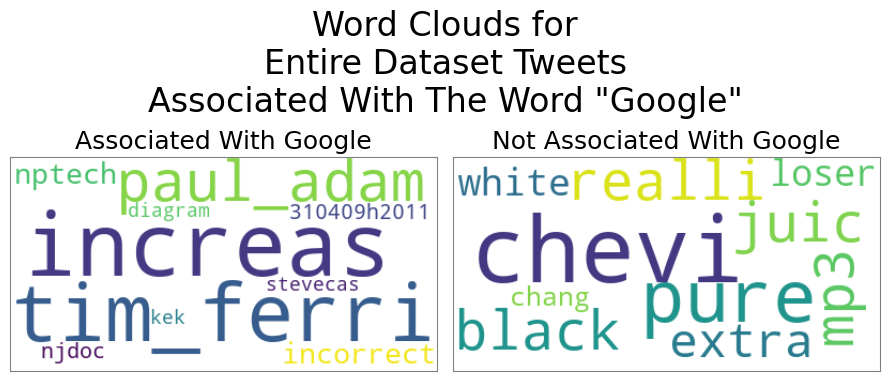

(increas        0.552)                  (chevi          0.024)
(tim_ferri      0.537)                  (pure          -0.003)
(paul_adam      0.536)                  (realli        -0.032)
(incorrect      0.533)                  (black         -0.035)
(nptech         0.531)                  (juic          -0.037)
(310409h2011    0.527)                  (mp3           -0.038)
(njdoc          0.526)                  (extra         -0.039)
(diagram        0.524)                  (white         -0.045)
(kek            0.523)                  (loser         -0.047)
(stevecas       0.522)                  (chang         -0.047)



In [121]:
#model_w2v_df_retain
#google_neg_wv
#all_wv
word_association_visual(model_w2v_df_retain, 'google');

Word associations throughout a dataset are great, but what about intentional associations to link up with other like minded people on Twitter? Enter the hashtag. 

The function below lists the top ten hashtags used for the given model slice and word. Similar to the function used above, it gives a word cloud of the hashtags and a tally below that shows how many times that hastag was used in the given model.

In [122]:
def hashtag_search(dfone, word):
    hashtagbag = []
    num_tweets = 0
    for i in dfone.index:
        if (word in dfone.loc[i, 'Tokens']):
            num_tweets += 1
            for hashtag in dfone.loc[i, 'Hashtags']:
                hashtagbag.append(hashtag)
    count = tally(hashtagbag)
    t = ('Word Cloud For Included Hashtags In\n' +
          titles[dfone.name] + ' Tweets\n' + 
          'That Include The Word "' + word.capitalize() + '"\n')
    tot = str(len(dfone))
    wc(hashtagbag, title = t, re = r"#(?:\w[\w']+)")
    print('For the', titles[dfone.name], 'set of', tot,'tweets:')
    print('The word "' + word.capitalize() +'" is included in',
          str(num_tweets) + '/' + tot, 'tweets.')
    print()
    print('Top ten Hashtags included with the word "' + word.capitalize() +
          '":')
    for pair in count[:10]:
        print(pair)
    return count

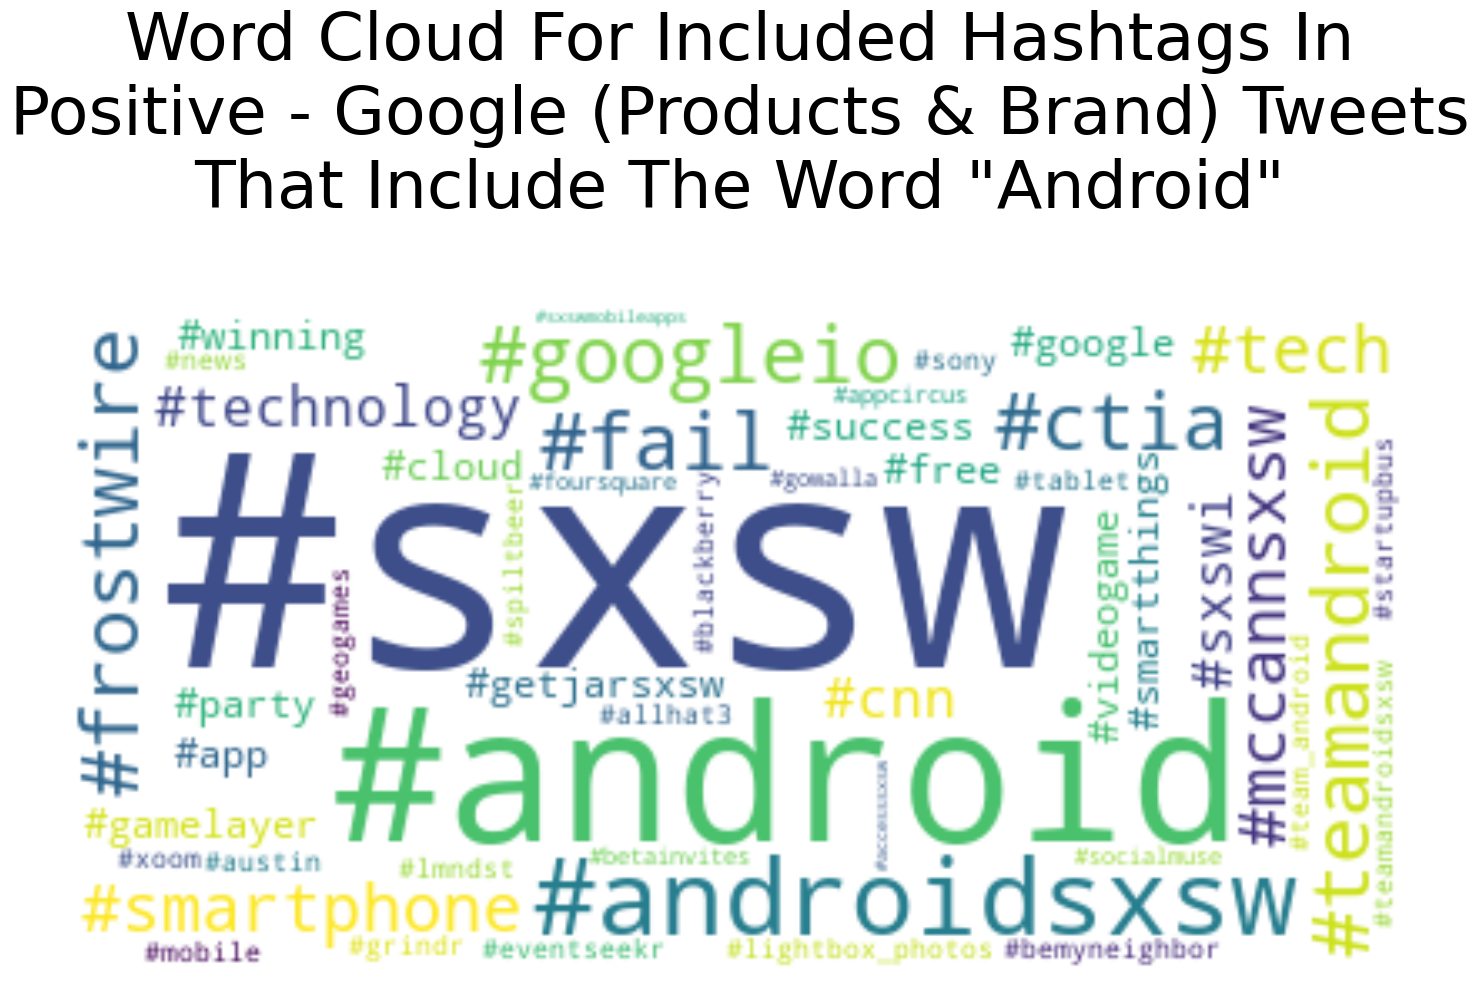

For the Positive - Google (Products & Brand) set of 662 tweets:
The word "Android" is included in 100/662 tweets.

Top ten Hashtags included with the word "Android":
('#sxsw', 101)
('#android', 26)
('#androidsxsw', 4)
('#ctia', 2)
('#googleio', 2)
('#fail', 2)
('#teamandroid', 2)
('#frostwire', 2)
('#tech', 2)
('#mccannsxsw', 2)


In [123]:
hash_count = hashtag_search(df_w2v_pos_g, 'android')

In [124]:
key_assoc_negative_google  = ['trend', 'buzz', 'buzz', 'apps', 'android',
                             'images', 'maps', 'marissa_mayer']
key_assoc_neutral_google   = ['marissa_mayer', 'maps']
key_assoc_positive_google  = ['maps', 'navigation', 'expected', 'evolving',
                             'fast', 'cool', 'video']

hashtags_negative_google   = ['#circles', '#social', '#bing']
hashtags_neutral_google    = ['#circles', '#facebook', '#socialmedia',
                             '#marissagoogle']
hashtags_positive_google   = ['#circles', '#marissagoogle']

key_assoc_negative_android = ['google', 'images', 'maps', 'app', 'phone',
                              'update', 'version', 'options', 'marissa_mayer']
key_assoc_neutral_android  = ['team', 'awards', 'samsung', 'chrome', 'details']
key_assoc_positive_android = ['congrats', 'job', 'huzzah', 'awesome', 'thanks',
                              'android_app', 'choice']

hashtags_negative_android  = ['#fail']
hashtags_neutral_android   = ['#tech', '#app']
hashtags_positive_android  = ['#teamandroid']


# Building Models
I will fit each vectorization technique with the following models:
1. Multinomial Naive Bayes 
2. Logistic Regression
3. Support Vector Machine
4. RandomForest
5. XGBoost

In [125]:
df[[modstr, modtok, 'Hashtags',
           'Keywords', 'Target Text', 'Target']].head()

Stemmed Tweet  \
0                               wesley83 3g iphone hrs tweet rise_austin dead need upgrad plugin station sxsw   
1                      jessede know fludapp awesom ipad iphone_app like appreci design also give free ts sxsw   
2                                                                        swonderlin wait ipad2 also sale sxsw   
3                                                           sxsw hope year festiv crashi year iphone_app sxsw   
4  sxtxstate great stuff fri sxsw marissa_mayer google tim_o_reilli tech book confer matt_mullenweg wordpress   

                                                                                                             Stemmed Tokens  \
0                                [wesley83, 3g, iphone, hrs, tweet, rise_austin, dead, need, upgrad, plugin, station, sxsw]   
1                     [jessede, know, fludapp, awesom, ipad, iphone_app, like, appreci, design, also, give, free, ts, sxsw]   
2                                                                               [swonderlin, wait, ipad2, also, sale, sxsw]   
3                                                                [sxsw, hope, year, festiv, crashi, year, iphone_app, sxsw]   
4  [sxtxstate, great, stuff, fri, sxsw, marissa_mayer, google, tim_o_reilli, tech, book, confer, matt_mullenweg, wordpress]   

                Hashtags              Keywords                Target Text  \
0  [#rise_austin, #sxsw]                iPhone  Negative - Apple Products   
1                [#sxsw]       iPad iPhone_App  Positive - Apple Products   
2        [#ipad2, #sxsw]                 iPad2  Positive - Apple Products   
3                [#sxsw]            iPhone_App  Negative - Apple Products   
4                [#sxsw]  Google Marissa_Mayer    Positive - Google Brand   

   Target  
0       3  
1       5  
2       5  
3       3  
4       8

## Multinomial Naive Bayes

In [126]:
f1_scores = pd.DataFrame(columns = ['Model', 'Vectorization', 
        'K-Fold', 'F1 Average Micro', 
        'F1 Average Macro', 'F1 Average Weighted'])

f1_scores

Empty DataFrame
Columns: [Model, Vectorization, K-Fold, F1 Average Micro, F1 Average Macro, F1 Average Weighted]
Index: []

In [127]:
baseline_model.fit(xtrain_tfidf, ytrain)

prediction = baseline_model.predict(xtest_tfidf)

avg = ['micro', 'macro', 'weighted']

df_row = ['Multinomial Naive Bayes', 'TF-IDF', mnb_tfidf_xtrain_kfold.mean()]
for a in range(len(avg)):
    df_row.append(f1_score(ytest, prediction, average = avg[a]))

f1_scores.loc[len(f1_scores)] = df_row

In [128]:
baseline_model.fit(xtrain_bow, ytrain)
prediction = baseline_model.predict(xtest_bow)

df_row = ['Multinomial Naive Bayes',
          'Bag-Of-Words', mnb_bow_xtrain_kfold.mean()]
for a in range(len(avg)):
    df_row.append(f1_score(ytest, prediction, average = avg[a]))

f1_scores.loc[len(f1_scores)] = df_row

In [129]:
baseline_model.fit(xtrain_w2v_norm, ytrain)
prediction = baseline_model.predict(xtest_w2v_norm)

df_row = ['Multinomial Naive Bayes', 'Word2Vec', mnb_w2v_xtrain_kfold.mean()]
for a in range(len(avg)):
    df_row.append(f1_score(ytest, prediction, average = avg[a]))

f1_scores.loc[len(f1_scores)] = df_row

In [130]:
f1_scores

Model Vectorization  K-Fold  F1 Average Micro  \
0  Multinomial Naive Bayes        TF-IDF   0.564             0.254   
1  Multinomial Naive Bayes  Bag-Of-Words   0.595             0.579   
2  Multinomial Naive Bayes      Word2Vec   0.456             0.470   

   F1 Average Macro  F1 Average Weighted  
0             0.134                0.216  
1             0.423                0.561  
2             0.339                0.455

## Logistic Regression

In [131]:
lreg = LogisticRegression(solver='lbfgs', max_iter=8000)

In [132]:
log_tfidf_train = cross_val_score(lreg, xtrain_tfidf, ytrain)
log_tfidf_train.mean()

0.598300283286119

In [133]:
log_bow_xtrain_kfold = cross_val_score(lreg, xtrain_bow, ytrain)
log_bow_xtrain_kfold.mean()

0.6436260623229462

In [134]:
log_w2v_xtrain_kfold = cross_val_score(lreg, xtrain_w2v_norm, ytrain)
log_w2v_xtrain_kfold.mean()

0.6173748819641169

In [135]:
lreg.fit(xtrain_tfidf, ytrain)
prediction = lreg.predict(xtest_tfidf)

df_row = ['Logistic Regression', 'TF-IDF', log_tfidf_train.mean()]
for a in range(len(avg)):
    df_row.append(f1_score(ytest, prediction, average = avg[a]))

f1_scores.loc[len(f1_scores)] = df_row

In [136]:
lreg.fit(xtrain_bow, ytrain)
prediction = lreg.predict(xtest_bow)

df_row = ['Logistic Regression', 'Bag-Of-Words', log_bow_xtrain_kfold.mean()]
for a in range(len(avg)):
    df_row.append(f1_score(ytest, prediction, average = avg[a]))

f1_scores.loc[len(f1_scores)] = df_row

In [137]:
lreg.fit(xtrain_w2v, ytrain) 
prediction = lreg.predict(xtest_w2v)

df_row = ['Logistic Regression', 'Word2Vec', log_w2v_xtrain_kfold.mean()]
for a in range(len(avg)):
    df_row.append(f1_score(ytest, prediction, average = avg[a]))

f1_scores.loc[len(f1_scores)] = df_row

In [138]:
f1_scores

Model Vectorization  K-Fold  F1 Average Micro  \
0  Multinomial Naive Bayes        TF-IDF   0.564             0.254   
1  Multinomial Naive Bayes  Bag-Of-Words   0.595             0.579   
2  Multinomial Naive Bayes      Word2Vec   0.456             0.470   
3      Logistic Regression        TF-IDF   0.598             0.320   
4      Logistic Regression  Bag-Of-Words   0.644             0.647   
5      Logistic Regression      Word2Vec   0.617             0.597   

   F1 Average Macro  F1 Average Weighted  
0             0.134                0.216  
1             0.423                0.561  
2             0.339                0.455  
3             0.179                0.266  
4             0.487                0.628  
5             0.406                0.560

## Support Vector Machine

In [139]:
svc = svm.SVC(kernel='linear', C=1, probability=True)

In [140]:
svc_tfidf_xtrain_kfold = cross_val_score(svc, xtrain_tfidf, ytrain)
svc_tfidf_xtrain_kfold.mean()

0.5996222851746931

In [141]:
svc_bow_xtrain_kfold = cross_val_score(svc, xtrain_bow, ytrain)
svc_bow_xtrain_kfold.mean()

0.6243626062322946

In [142]:
svc_w2v_xtrain_kfold = cross_val_score(svc, xtrain_w2v, ytrain)
svc_w2v_xtrain_kfold.mean()

0.6217186024551464

In [143]:
svc.fit(xtrain_tfidf, ytrain)
prediction = svc.predict(xtest_tfidf)

avg = ['micro', 'macro', 'weighted']

df_row = ['Support Vector Machine', 'TF-IDF', svc_tfidf_xtrain_kfold.mean()]
for a in range(len(avg)):
    df_row.append(f1_score(ytest, prediction, average = avg[a]))

f1_scores.loc[len(f1_scores)] = df_row

In [144]:
svc.fit(xtrain_bow, ytrain)
prediction = svc.predict(xtest_bow)

df_row = ['Support Vector Machine', 'Bag-Of-Words', svc_bow_xtrain_kfold.mean()]
for a in range(len(avg)):
    df_row.append(f1_score(ytest, prediction, average = avg[a]))

f1_scores.loc[len(f1_scores)] = df_row

In [145]:
svc.fit(xtrain_w2v, ytrain)
prediction = svc.predict(xtest_w2v)

df_row = ['Support Vector Machine', 'Word2Vec', svc_w2v_xtrain_kfold.mean()]
for a in range(len(avg)):
    df_row.append(f1_score(ytest, prediction, average = avg[a]))

f1_scores.loc[len(f1_scores)] = df_row

In [146]:
f1_scores

Model Vectorization  K-Fold  F1 Average Micro  \
0  Multinomial Naive Bayes        TF-IDF   0.564             0.254   
1  Multinomial Naive Bayes  Bag-Of-Words   0.595             0.579   
2  Multinomial Naive Bayes      Word2Vec   0.456             0.470   
3      Logistic Regression        TF-IDF   0.598             0.320   
4      Logistic Regression  Bag-Of-Words   0.644             0.647   
5      Logistic Regression      Word2Vec   0.617             0.597   
6   Support Vector Machine        TF-IDF   0.600             0.326   
7   Support Vector Machine  Bag-Of-Words   0.624             0.629   
8   Support Vector Machine      Word2Vec   0.622             0.610   

   F1 Average Macro  F1 Average Weighted  
0             0.134                0.216  
1             0.423                0.561  
2             0.339                0.455  
3             0.179                0.266  
4             0.487                0.628  
5             0.406                0.560  
6             0.181                0.291  
7             0.491                0.620  
8             0.389                0.561

## Random Forest

In [147]:
rf = RandomForestClassifier(n_estimators=400, random_state=11)

In [148]:
rf_tfidf_xtrain_kfold = cross_val_score(rf, xtrain_tfidf, ytrain)
rf_tfidf_xtrain_kfold.mean()

0.5818696883852692

In [149]:
rf_bow_xtrain_kfold = cross_val_score(rf, xtrain_bow, ytrain)
rf_bow_xtrain_kfold.mean()

0.6243626062322946

In [150]:
rf_w2v_xtrain_kfold = cross_val_score(rf, xtrain_w2v, ytrain)
rf_w2v_xtrain_kfold.mean()

0.5773371104815863

In [151]:
rf.fit(xtrain_tfidf, ytrain)
prediction = rf.predict(xtest_tfidf)

df_row = ['Random Forest', 'TF-IDF', rf_tfidf_xtrain_kfold.mean()]
for a in range(len(avg)):
    df_row.append(f1_score(ytest, prediction, average = avg[a]))

f1_scores.loc[len(f1_scores)] = df_row

In [152]:
rf.fit(xtrain_bow, ytrain)
prediction = rf.predict(xtest_bow)

df_row = ['Random Forest', 'Bag-Of-Words', rf_bow_xtrain_kfold.mean()]
for a in range(len(avg)):
    df_row.append(f1_score(ytest, prediction, average = avg[a]))

f1_scores.loc[len(f1_scores)] = df_row

In [153]:
rf.fit(xtrain_w2v, ytrain)
prediction = rf.predict(xtest_w2v)

df_row = ['Random Forest', 'Word2Vec', rf_w2v_xtrain_kfold.mean()]
for a in range(len(avg)):
    df_row.append(f1_score(ytest, prediction, average = avg[a]))

f1_scores.loc[11] = df_row

In [154]:
f1_scores

Model Vectorization  K-Fold  F1 Average Micro  \
0   Multinomial Naive Bayes        TF-IDF   0.564             0.254   
1   Multinomial Naive Bayes  Bag-Of-Words   0.595             0.579   
2   Multinomial Naive Bayes      Word2Vec   0.456             0.470   
3       Logistic Regression        TF-IDF   0.598             0.320   
4       Logistic Regression  Bag-Of-Words   0.644             0.647   
5       Logistic Regression      Word2Vec   0.617             0.597   
6    Support Vector Machine        TF-IDF   0.600             0.326   
7    Support Vector Machine  Bag-Of-Words   0.624             0.629   
8    Support Vector Machine      Word2Vec   0.622             0.610   
9             Random Forest        TF-IDF   0.582             0.295   
10            Random Forest  Bag-Of-Words   0.624             0.611   
11            Random Forest      Word2Vec   0.577             0.569   

    F1 Average Macro  F1 Average Weighted  
0              0.134                0.216  
1              0.423                0.561  
2              0.339                0.455  
3              0.179                0.266  
4              0.487                0.628  
5              0.406                0.560  
6              0.181                0.291  
7              0.491                0.620  
8              0.389                0.561  
9              0.178                0.258  
10             0.428                0.574  
11             0.374                0.527

## XGBoost

In [155]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, num_class = 12,
                    use_label_encoder=False, eval_metric = 'mlogloss')

In [156]:
xgb_tfidf_xtrain_kfold = cross_val_score(xgb, xtrain_tfidf, ytrain)
xgb_tfidf_xtrain_kfold.mean()

0.5637393767705382

In [157]:
xgb_bow_xtrain_kfold = cross_val_score(xgb, xtrain_bow, ytrain)
xgb_bow_xtrain_kfold.mean()

0.6077431539187914

In [158]:
xgb_w2v_xtrain_kfold = cross_val_score(xgb, xtrain_w2v, ytrain)
xgb_w2v_xtrain_kfold.mean()

0.6066100094428706

In [159]:
xgb.fit(xtrain_tfidf, ytrain)
prediction = xgb.predict(xtest_tfidf)

df_row = ['XGBoost', 'TF-IDF', xgb_tfidf_xtrain_kfold.mean()]
for a in range(len(avg)):
    df_row.append(f1_score(ytest, prediction, average = avg[a]))

f1_scores.loc[len(f1_scores)] = df_row

In [160]:
xgb.fit(xtrain_bow, ytrain)
prediction = xgb.predict(xtest_bow)

df_row = ['XGBoost', 'Bag-Of-Words', xgb_bow_xtrain_kfold.mean()]
for a in range(len(avg)):
    df_row.append(f1_score(ytest, prediction, average = avg[a]))

f1_scores.loc[len(f1_scores)] = df_row

In [161]:
xgb.fit(xtrain_w2v, ytrain)
prediction = xgb.predict(xtest_w2v)

df_row = ['XGBoost', 'Word2Vec', xgb_w2v_xtrain_kfold.mean()]
for a in range(len(avg)):
    df_row.append(f1_score(ytest, prediction, average = avg[a]))

f1_scores.loc[14] = df_row

In [162]:
f1_scores

Model Vectorization  K-Fold  F1 Average Micro  \
0   Multinomial Naive Bayes        TF-IDF   0.564             0.254   
1   Multinomial Naive Bayes  Bag-Of-Words   0.595             0.579   
2   Multinomial Naive Bayes      Word2Vec   0.456             0.470   
3       Logistic Regression        TF-IDF   0.598             0.320   
4       Logistic Regression  Bag-Of-Words   0.644             0.647   
5       Logistic Regression      Word2Vec   0.617             0.597   
6    Support Vector Machine        TF-IDF   0.600             0.326   
7    Support Vector Machine  Bag-Of-Words   0.624             0.629   
8    Support Vector Machine      Word2Vec   0.622             0.610   
9             Random Forest        TF-IDF   0.582             0.295   
10            Random Forest  Bag-Of-Words   0.624             0.611   
11            Random Forest      Word2Vec   0.577             0.569   
12                  XGBoost        TF-IDF   0.564             0.310   
13                  XGBoost  Bag-Of-Words   0.608             0.619   
14                  XGBoost      Word2Vec   0.607             0.594   

    F1 Average Macro  F1 Average Weighted  
0              0.134                0.216  
1              0.423                0.561  
2              0.339                0.455  
3              0.179                0.266  
4              0.487                0.628  
5              0.406                0.560  
6              0.181                0.291  
7              0.491                0.620  
8              0.389                0.561  
9              0.178                0.258  
10             0.428                0.574  
11             0.374                0.527  
12             0.152                0.246  
13             0.464                0.608  
14             0.434                0.573

In [163]:
print(f1_scores['F1 Average Micro'].max())
print(f1_scores['F1 Average Macro'].max())
print(f1_scores['F1 Average Weighted'].max())


0.6472809667673716
0.49097061848680373
0.6279427960726193


In [164]:
def plot_matrix(model, xt, yt, the_title = '', color = plt.cm.Blues): 
    font = {'family' : 'DejaVu Sans',
            'weight' : 'bold',
            'size'   : 16}
    plt.rc('font', **font)

    fig, ax = plt.subplots(figsize=(10,10))
    ConfusionMatrixDisplay.from_estimator(model, xt, yt,
                                          cmap=color, ax=ax)

    plt.title(the_title)
    plt.show()

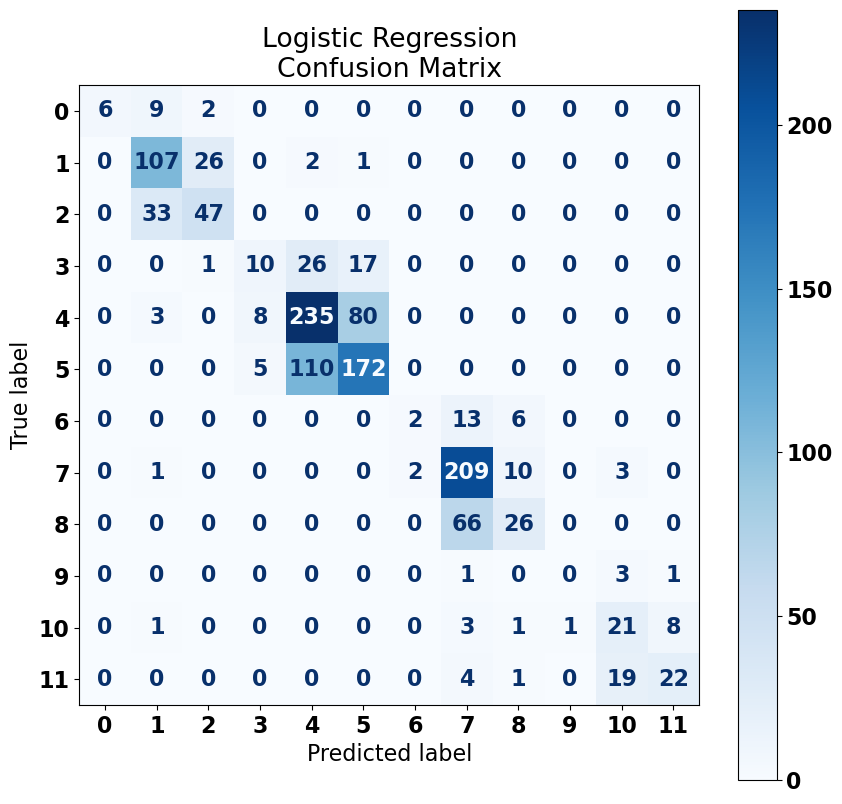

Logisic Regression Classification Report
              precision    recall  f1-score   support

           0     1.0000    0.3529    0.5217        17
           1     0.6948    0.7868    0.7379       136
           2     0.6184    0.5875    0.6026        80
           3     0.4348    0.1852    0.2597        54
           4     0.6300    0.7209    0.6724       326
           5     0.6370    0.5993    0.6176       287
           6     0.5000    0.0952    0.1600        21
           7     0.7061    0.9289    0.8023       225
           8     0.5909    0.2826    0.3824        92
           9     0.0000    0.0000    0.0000         5
          10     0.4565    0.6000    0.5185        35
          11     0.7097    0.4783    0.5714        46

    accuracy                         0.6473      1324
   macro avg     0.5815    0.4681    0.4872      1324
weighted avg     0.6382    0.6473    0.6279      1324





In [165]:
# The Confusion Matrix

lreg.fit(xtrain_bow, ytrain)
prediction = lreg.predict(xtest_bow)

#Plot Confusion Matrix
plot_matrix(lreg, xtest_bow, ytest, 
            'Logistic Regression\nConfusion Matrix', plt.cm.Blues)
            
#Classification Report
print('Logisic Regression Classification Report')
print(classification_report(ytest, prediction, zero_division = 0, digits=4));
print()
print()

<Figure size 2000x2000 with 0 Axes>

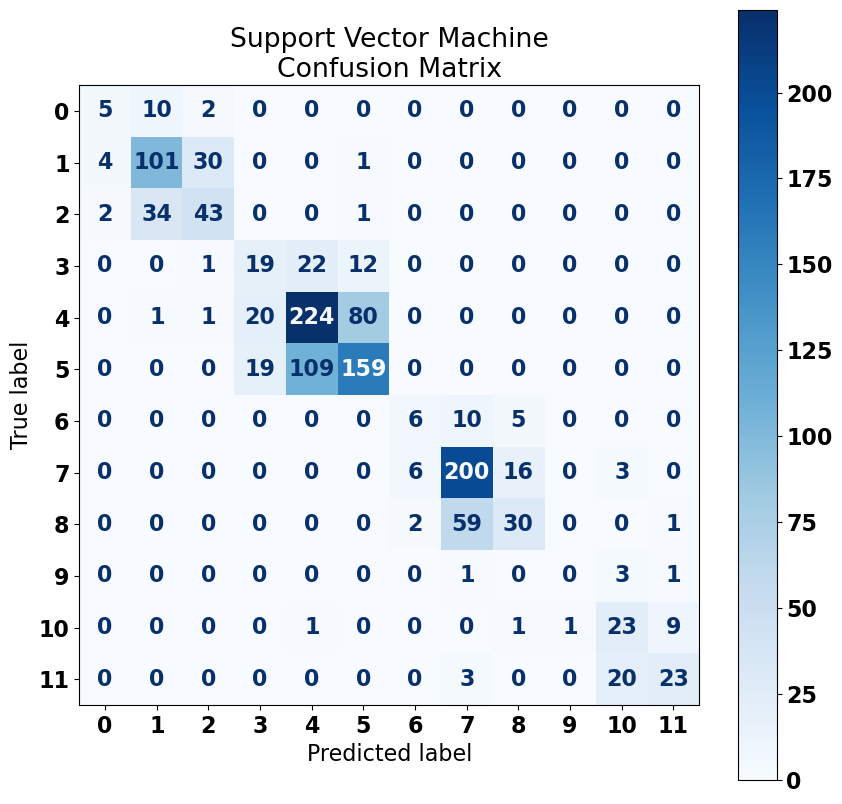

Support Vector Machine Classification Report
              precision    recall  f1-score   support

           0     0.4545    0.2941    0.3571        17
           1     0.6918    0.7426    0.7163       136
           2     0.5584    0.5375    0.5478        80
           3     0.3276    0.3519    0.3393        54
           4     0.6292    0.6871    0.6569       326
           5     0.6285    0.5540    0.5889       287
           6     0.4286    0.2857    0.3429        21
           7     0.7326    0.8889    0.8032       225
           8     0.5769    0.3261    0.4167        92
           9     0.0000    0.0000    0.0000         5
          10     0.4694    0.6571    0.5476        35
          11     0.6765    0.5000    0.5750        46

    accuracy                         0.6292      1324
   macro avg     0.5145    0.4854    0.4910      1324
weighted avg     0.6225    0.6292    0.6198      1324



In [166]:
#Plot Confusion Matrix
svc.fit(xtrain_bow, ytrain)
prediction = svc.predict(xtest_bow)

# Plot Confusion Matrix
plt.figure(figsize=(20, 20))
plot_matrix(svc, xtest_bow, ytest,
            'Support Vector Machine\nConfusion Matrix')

#Classification Report
print('Support Vector Machine Classification Report')
print(classification_report(ytest, prediction, zero_division = 0, digits=4))

# Tuning Models
The f1 scores of both Logistic Regression and Support Vector Machine using Bag-Of-Words vectorization are the highest. I'll try to tune both of them. First, Logistic Regression.

In [167]:
#The Hyperparameters I'll fine tune and their options.
param_grid_lreg = {
    'solver'   : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty'  : ['l1', 'l2', 'elasticnet'],
    'C'        : [100, 10, 1.0, 0.1, 0.01], 
    'max_iter' : [1000, 5000, 6000, 7000, 8000, 9000, 10000]
}

#LogisticRegression(solver='lbfgs',max_iter=8000, penalty = l2, C = 1.0)
# f1 weighted score = 0.628

lreg_cv = LogisticRegression()
grid_log = GridSearchCV(lreg_cv, param_grid_lreg,
                        scoring='f1_weighted', cv=None)
grid_log.fit(xtrain_bow, ytrain)

print("Tuned Logistic Regression Parameters: {}".format(grid_log.best_params_))
print("Best score is {}".format(grid_log.best_score_))
print("The scorer used is {}".format(grid_log.scorer_))

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting 

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting 

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting 

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting 

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Se

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting 

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting 

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting 

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Se

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting 

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting 

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting 

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Se

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting 

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting 

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting 

Tuned Logistic Regression Parameters: {'C': 1.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag'}
Best score is 0.623329128449843
The scorer used is make_scorer(f1_score, pos_label=None, average=weighted)


In [168]:
from sklearn.model_selection import RandomizedSearchCV

#The Hyperparameters I'll fine tune and their options.
param_grid_lreg = {
    'solver'   : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty'  : [None, 'l1', 'l2', 'elasticnet'],
    'C'        : [100, 10, 1.0, 0.1, 0.01], 
    'max_iter' : [1000, 5000, 6000, 7000, 8000, 9000, 10000]
}

#LogisticRegression(solver='lbfgs',max_iter=8000, penalty = l2, C = 1.0)
# f1 weighted score = 0.628

lreg_cv = LogisticRegression()
rand_log = RandomizedSearchCV(lreg_cv, param_grid_lreg, n_iter=500,
                              scoring='f1_weighted', n_jobs=-1, cv=None,
                              random_state=1)
rand_log.fit(xtrain_bow, ytrain)

print("Tuned Logistic Regression Parameters: {}".format(rand_log.best_params_))
print("Best score is {}".format(rand_log.best_score_))
print("The scorer used is {}".format(rand_log.scorer_))

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


1140 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_l

Tuned Logistic Regression Parameters: {'solver': 'sag', 'penalty': 'l2', 'max_iter': 6000, 'C': 1.0}
Best score is 0.623329128449843
The scorer used is make_scorer(f1_score, pos_label=None, average=weighted)


In [169]:
#The Hyperparameters I'll fine tune and their options.
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 'scale', 'auto'],
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
    'probability' : [False, True]
}
#SVC(C=1, gamma = scale, kernel='linear', probability=True)
#f1 weighted score = 0.620

svm_cv = svm.SVC()
grid_svm = GridSearchCV(svm_cv, param_grid_svm,
                        scoring='f1_weighted', cv=None)
grid_svm.fit(xtrain_bow, ytrain)

print("Tuned Support Vector Machine Parameters: {}".format(
    grid_svm.best_params_))
print("Best score is {}".format(grid_svm.best_score_))
print("The scorer used is {}".format(grid_svm.scorer_))

Tuned Support Vector Machine Parameters: {'C': 1, 'gamma': 1, 'kernel': 'linear', 'probability': False}
Best score is 0.6153571885726168
The scorer used is make_scorer(f1_score, pos_label=None, average=weighted)


In [170]:
#The Hyperparameters I'll fine tune and their options.
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 'scale', 'auto'],
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
    'probability' : [False, True]
}
#SVC(C=1, gamma = scale, kernel='linear', probability=True)
#f1 weighted score = 0.620

svm_cv = svm.SVC()
rand_svm = RandomizedSearchCV(svm_cv, param_grid_svm,n_iter=500,
                              scoring='f1_weighted', n_jobs=-1, cv=None,
                              random_state=1)
rand_svm.fit(xtrain_bow, ytrain)

print("Tuned Support Vector Machine Parameters: {}".format(
    rand_svm.best_params_))
print("Best score is {}".format(rand_svm.best_score_))
print("The scorer used is {}".format(rand_svm.scorer_))

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 192 is smaller than n_iter=500. Running 192 iterations. For exhaustive searches, use GridSearchCV.



Tuned Support Vector Machine Parameters: {'probability': False, 'kernel': 'linear', 'gamma': 1, 'C': 1}
Best score is 0.6153571885726168
The scorer used is make_scorer(f1_score, pos_label=None, average=weighted)


# Questions for Morgan:
1. What should my Train Test split percentages be?
Typically 9000 stick to 20/25 for test.

What are the words that arise out of the positive or negative tweets that arise often? What services do people write about positively and negatively?

Write about how to use this model for the benefit. An actionable recommendation.


2. My steps are:
    1. Define the 5800 tweets as either Apple, Google, or delete them.
    2. Split data into Apple & Google Tweets. This will involve a word search seeing what key words are included in the tweet (Products and company names)
    3. Put it all in lower case.
    3a. Remove HTML, URLs, clean up mentions by deleting all @ symbols.
    4. Tokenize everything / evaluate frequencies
    5. Build a baseline model with TfidfVectorizer and MultinomialNB
    5a. Account Vectorizor
    6. The final NLP lab lists the next five considerations. I'm honestly a little puzzled by them at first glance as I did this a few months ago.
    * Do we remove stop words or not?
    * What should be counted as a token? Do we stem or lemmatize our text data, or leave the words as is? Do we want to include non-"words" in our tokens?
    * Do we engineer other features, such as bigrams, or POS tags, or Mutual Information Scores?
    * Do we use the entire vocabulary, or just limit the model to a subset of the most frequently used words? If so, how many?
    * What sort of vectorization should we use in our model? Boolean Vectorization? Count Vectorization? TF-IDF? More advanced vectorization strategies such as Word2Vec?
    
Target is part of the model.
The projects will require us to have a target for 

# Meeting notes 2/27/23
Use Spell check (installed)
Use Prettyfy (installed)
Add visualizations earlier in the notebook
Use a confusion matrix for... something
Use Vectorizer to find associated words with positive and negative tokens associated with Google. This will help Google's analysis of the data on how to improve.
Increase the list of stopwords rather than rely on the given stopwords.

Also, Morgan didn't have a problem with any of the cuts I described, though I need to ask him two questions:

1. There were four sentiments: Negative, Neutral, Positive, and "I can't tell." I cut any tweet that had "I can't tell" assigned to it. That OK?

2. Do the target numbers have to be in sequential order, or can they be any number? Do they have to be 0, 1, 2..., or can I give them a number that represents the categorization of the tweet much like the first number of a hotel room indicates what floor you're on?

What I've got, the first digit represents company, the second the brand or the product, and the third the sentiment. So 221 represents Google Brand Negative.

# Questions for 3/3/23 meeting
I have read through The TfidVectorization section of the NLP cumulative lab twice and I still don't understand it. I'm going to move forward because the next sections do make sense, but I need to ask Morgan about this section.



EDA - Exploratory data analysis

Try other types model
TF/IDF (Random Forest, Support vector, logistic regression model)
Word2vec

TF-IDF - a way to encode texts to numerical values.
Bag of Words, and Word Embeddings - Other vectorization techniques with models?
Bag of Words is generally the crudest and least effective NLP technique.
Vectorization - encodes texts to numerical values.
Word2Vec = Word Embeddings

Cross_val_score is a good scoring system.

Best performing model in predicting sentiment.


Recommendations for marketing purposes. To help Google understand based on twitter data.
Vectorized similar words most common terms.
Model Word2Vec

Start reaching out stronger, outside the curriculum.

Look at the notebooks that Morgan shared is Slack.
Word2Vec is a model itself, based no other terms in the corpus.

Read up on all or this.
Clean up 
Use more modeling technicques (Do the confusion matrix)
Word2Vec
More Visualizations
Remember the Recomendations are a reflection of the problem statement.


# Meeting notes 3/13/23
Morgan Meeting Notes
No Visualizations until stopwords & stemmed removed.
remove SXSW from the stopwords.
Use the stemmed version of the corpus.

Reduce visualizations instead of repeating

Confusion Matrix

Add 
Classification Report

A count plot

Count plots for words for how often they came up.


In [171]:
def model_stats(y, y_hat, df_name = None):
    train_residuals = np.abs(y - y_hat)
    err = sum(train_residuals == 1)
    cor = len(train_residuals) - err
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_hat)
    #roc_auc = auc(false_positive_rate, true_positive_rate)

    pre = "{:.2f}".format(round(precision_score(y, y_hat, 
             zero_division = 0, average = 'weighted')*100,2))
    rec = "{:.2f}".format(round(recall_score(y, y_hat, 
                               average = 'weighted')*100,2))
    acc = "{:.2f}".format(round(accuracy_score(y, y_hat)*100,2))
    fone = "{:.2f}".format(round(f1_score(y, y_hat, 
             zero_division = 0, average = 'weighted')*100,2))
#    roc_auc = "{:.2f}".format(round(roc_auc*100,2))

    classification_name = {'Precision: ' : pre, 
                           'Recall:    ' : rec,
                           'Accuracy:  ' : acc,
                           'F1:        ' : fone,
                           #'AUC:       ' : roc_auc
                          }

    print(f'Residuals Count:  {err}\t{round(err/(err+cor)*100,2)}%')
    print(f'True Predictions: {cor}\t{round(cor/(err+cor)*100,2)}%')

    print()
    for vclass in classification_name:
        name = vclass
        key = classification_name[name]
        if np.abs(float(key)) < 10:
            name = name + " "
        if float(key) < 0:
            name = name[0:-1]
        print(f'{name}{key}%')
        
    stats_block_row = {'Name' : df_name}
    stats_block_row.update(classification_name)

    if df_name != None:
        if 'stats_block' not in globals():
            global stats_block
            stats_block = pd.DataFrame(stats_block_row, index=[0])            
        else:
            stats_block = stats_block.append(
                stats_block_row, ignore_index=True)